In [1]:
%load_ext autoreload
%autoreload 2

In [146]:
from trott import *
from qiskit import IBMQ
from qiskit.providers.aer import QasmSimulator
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import curve_fit

In [3]:
trott_gate = gen_3cnot_trott_gate() # using the basic trott method (this can be changed)x
trott_steps_range = np.arange(4,18,1)
unitary_folding_steps_range = np.arange(0,10,1)
qcs = gen_st_qcs_range(trott_gate, trott_steps_range, unitary_folding_steps_range=unitary_folding_steps_range)
# qcs[10][-2].draw() # e.g. 10 trott steps, example tomo circuit

In [4]:
qcs[(4,3)][-1].draw()

»
q7_0: ─────────────────────────────────────────────────────────────»
           ┌────────────┐┌────────────┐┌────────────┐┌────────────┐»
q7_1: ─────┤0           ├┤0           ├┤0           ├┤0           ├»
           │            ││            ││            ││            │»
q7_2: ─────┤            ├┤            ├┤            ├┤            ├»
      ┌───┐│            ││            ││            ││            │»
q7_3: ┤ X ├┤1 Trot(π/4) ├┤1 Trot(π/4) ├┤1 Trot(π/4) ├┤1 Trot(π/4) ├»
      └───┘│            ││            ││            ││            │»
q7_4: ─────┤            ├┤            ├┤            ├┤            ├»
      ┌───┐│            ││            ││            ││            │»
q7_5: ┤ X ├┤2           ├┤2           ├┤2           ├┤2           ├»
      └───┘└────────────┘└────────────┘└────────────┘└────────────┘»
q7_6: ─────────────────────────────────────────────────────────────»
                                                                   »
c3: 3/═════════════════════════════════════════════════════════════»
                                                                   »
«                                                                    »
«q7_0: ──────────────────────────────────────────────────────────────»
«      ┌────────────┐┌───────────────┐┌────────────┐┌───────────────┐»
«q7_1: ┤0           ├┤0              ├┤0           ├┤0              ├»
«      │            ││               ││            ││               │»
«q7_2: ┤            ├┤               ├┤            ├┤               ├»
«      │            ││               ││            ││               │»
«q7_3: ┤1 Trot(π/4) ├┤1 Trot_dg(π/4) ├┤1 Trot(π/4) ├┤1 Trot_dg(π/4) ├»
«      │            ││               ││            ││               │»
«q7_4: ┤            ├┤               ├┤            ├┤               ├»
«      │            ││               ││            ││               │»
«q7_5: ┤2           ├┤2              ├┤2           ├┤2              ├»
«      └────────────┘└───────────────┘└────────────┘└───────────────┘»
«q7_6: ──────────────────────────────────────────────────────────────»
«                                                                    »
«c3: 3/══════════════════════════════════════════════════════════════»
«                                                                    »
«                                      ░          
«q7_0: ────────────────────────────────░──────────
«      ┌────────────┐┌───────────────┐ ░ ┌─┐      
«q7_1: ┤0           ├┤0              ├─░─┤M├──────
«      │            ││               │ ░ └╥┘      
«q7_2: ┤            ├┤               ├─░──╫───────
«      │            ││               │ ░  ║ ┌─┐   
«q7_3: ┤1 Trot(π/4) ├┤1 Trot_dg(π/4) ├─░──╫─┤M├───
«      │            ││               │ ░  ║ └╥┘   
«q7_4: ┤            ├┤               ├─░──╫──╫────
«      │            ││               │ ░  ║  ║ ┌─┐
«q7_5: ┤2           ├┤2              ├─░──╫──╫─┤M├
«      └────────────┘└───────────────┘ ░  ║  ║ └╥┘
«q7_6: ────────────────────────────────░──╫──╫──╫─
«                                      ░  ║  ║  ║ 
«c3: 3/═══════════════════════════════════╩══╩══╩═
«                                         0  1  2

# Prepare Backend

In [5]:
# load IBMQ Account data

# IBMQ.save_account(TOKEN)  # replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
provider = IBMQ.load_account()

In [6]:
# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')
# properties = jakarta.properties()

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim = QasmSimulator()

# Capture Data

In [92]:
# results = gen_results(qcs, backend=sim_noisy_jakarta, label="data/3cnot_noise_sim_unitary_folding", reps=2)
results = np.load('data/3cnot_noise_sim_unitary_folding_results_20220423__112000.npy',allow_pickle=True).item()

# Run Analysis

In [129]:
meas_fitter = gen_meas_fitter(backend=sim_noisy_jakarta)

In [186]:
res_analysis = run_analysis(results, meas_fitter=meas_fitter) 

Running Measurement Calibration:


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [02:39<00:00,  1.14s/it]


Generating Data Maps:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 935.93it/s]


Generating Parity Values:


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:02<00:00, 49.16it/s]


Running Metric Analysis:


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 70.88it/s]


Running Unitary Folding Extrapolation:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.18it/s]


Calculating Unitary Folding Extrapolated Fidelities:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:03<00:00,  3.73it/s]


Running Trotterization Extrapolation:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:05<00:00, 12.01it/s]


Calculating Trotterization Extrapolated Fidelity.


In [189]:
1- res_analysis["total"]["trott_infid"]

0.9658585779202222

In [131]:
compare_Z_parity(res_analysis)

 	Expected | n=(17, 9)
<ZZZ>	1.0	   0.088
<ZZI>	-1.0	   -0.030
<ZIZ>	-1.0	   -0.042
<IZZ>	1.0	   0.097
<ZII>	1.0	   0.121
<IZI>	-1.0	   -0.021
<IIZ>	-1.0	   -0.144


# Plots

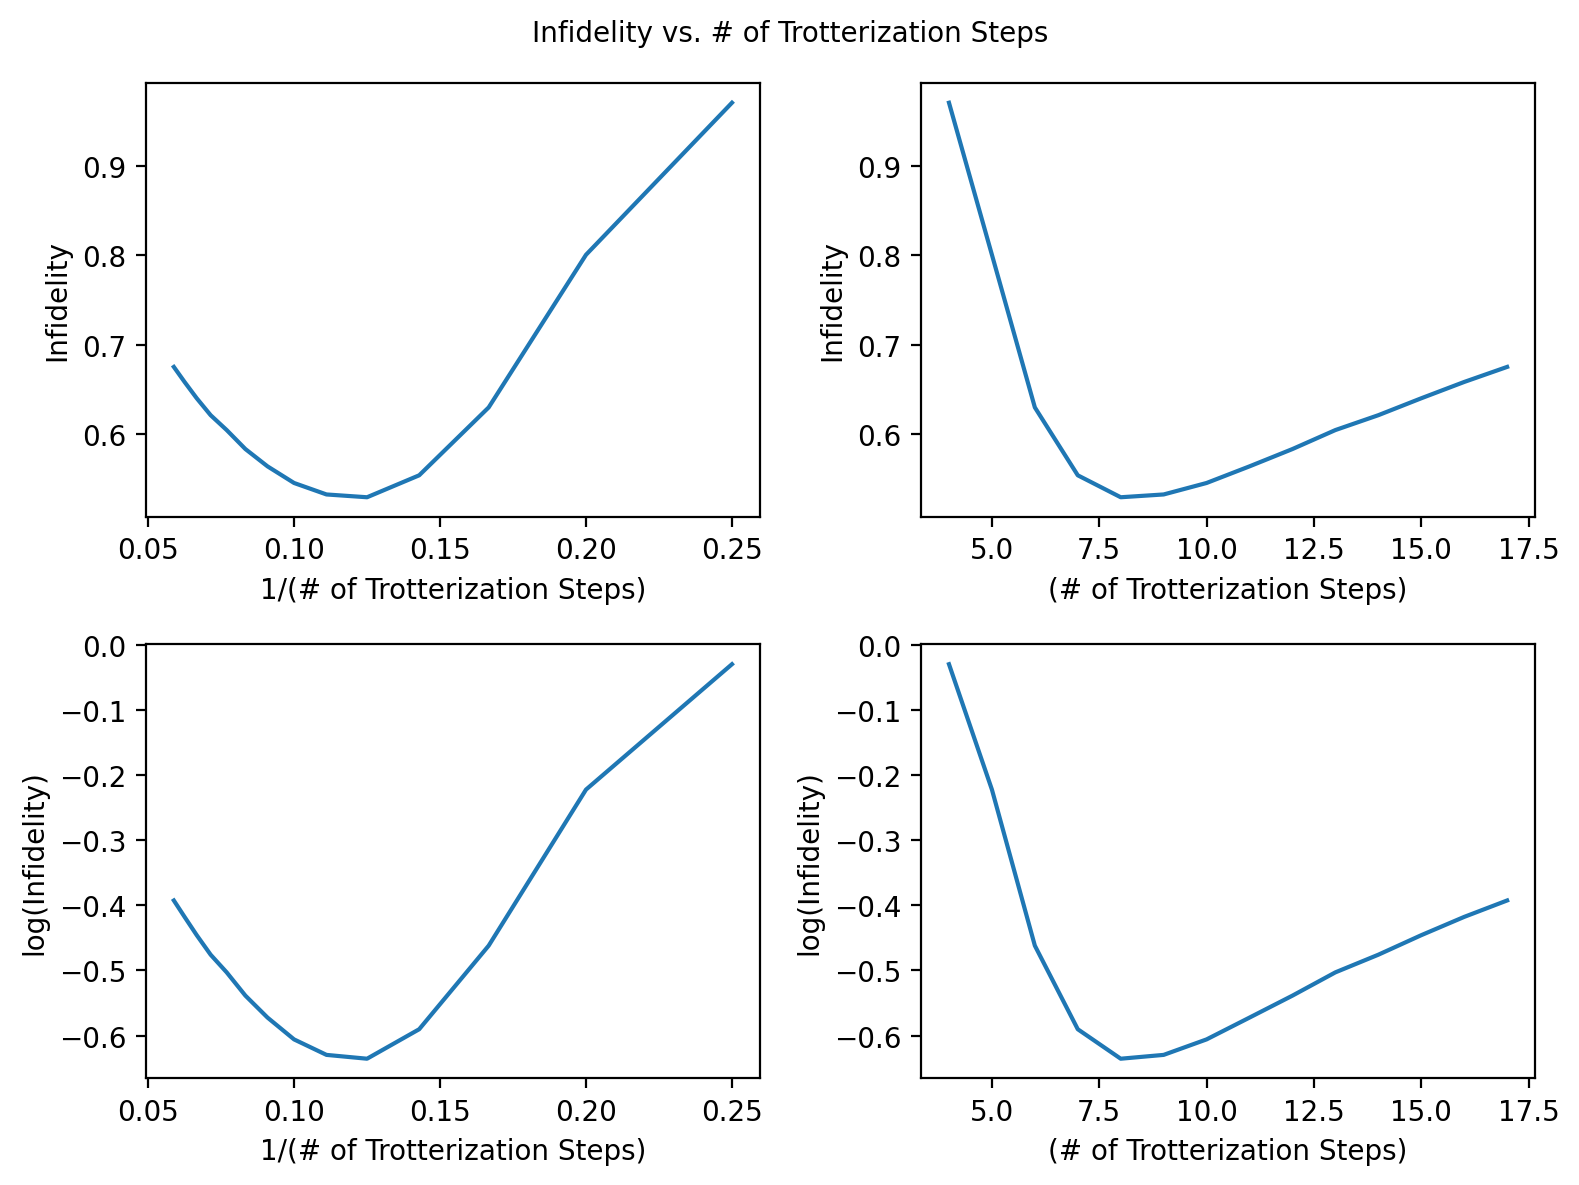

In [132]:
axs = plot_fidelities(res_analysis)

0.13878355105599094

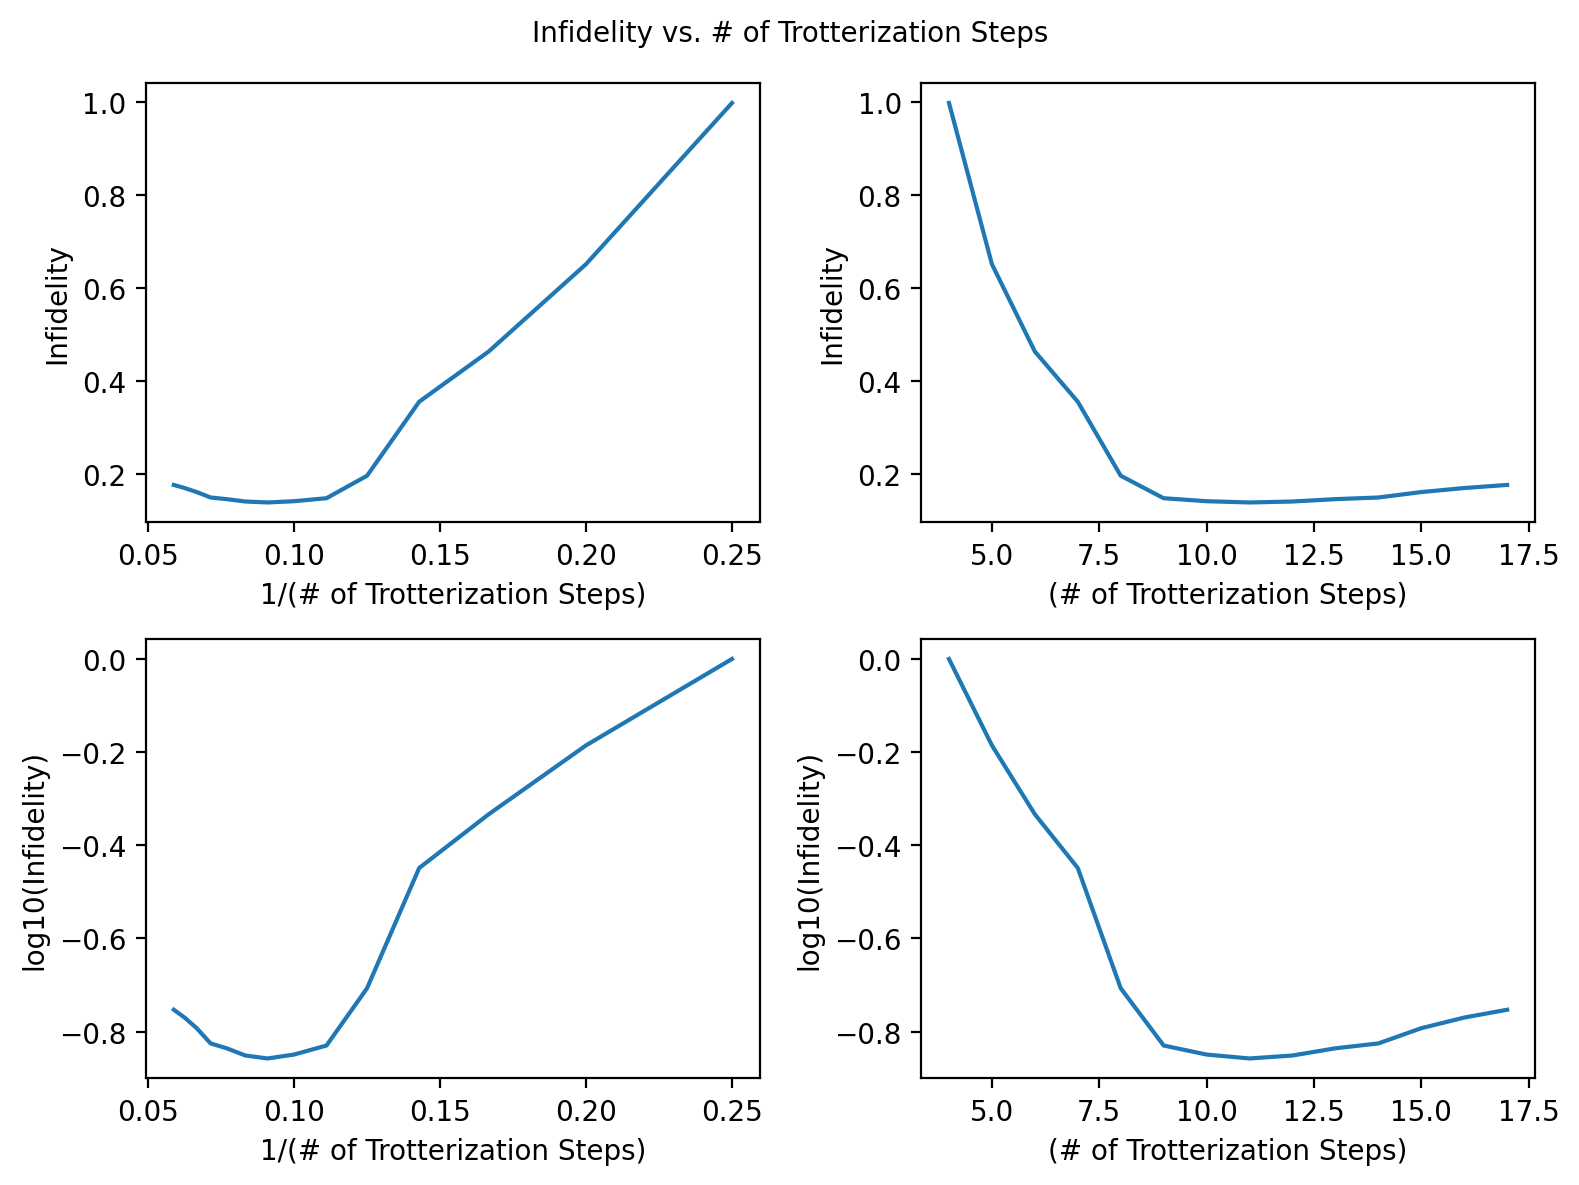

In [188]:
axs = plot_fidelities(res_analysis, key="uf_infid", data_key="analysis")
res_analysis["analysis"][11]["uf_infid"]

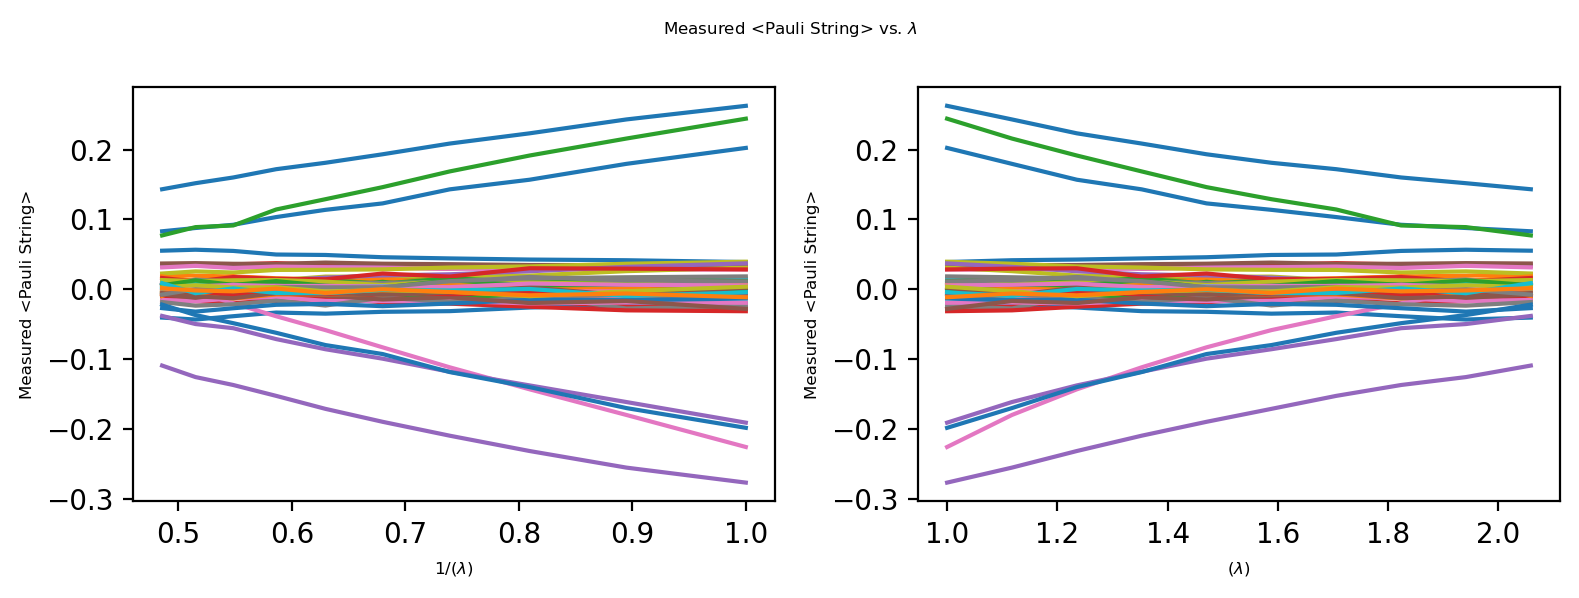

In [125]:
axs = plot_parity(res_analysis, sweep_param_parser=unitary_folding_parser_factory(n=17), x_label="$\lambda$")

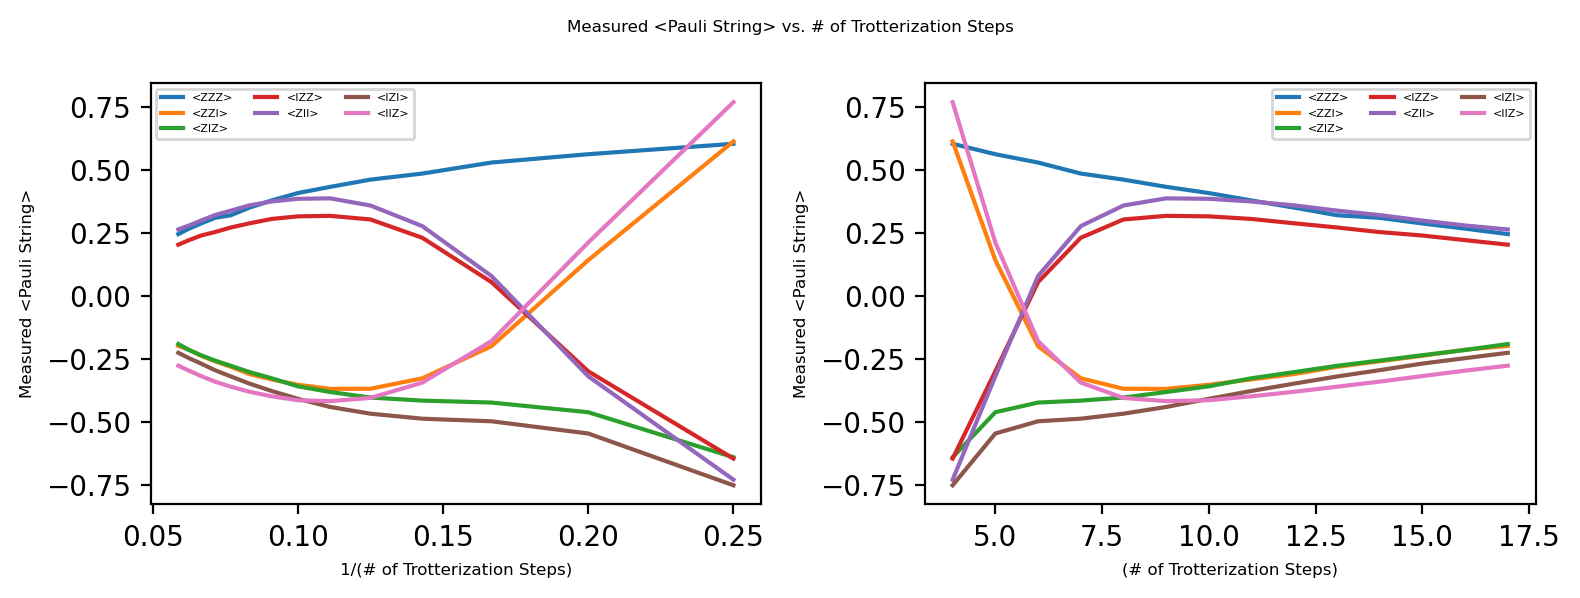

In [126]:
axs = plot_parity(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

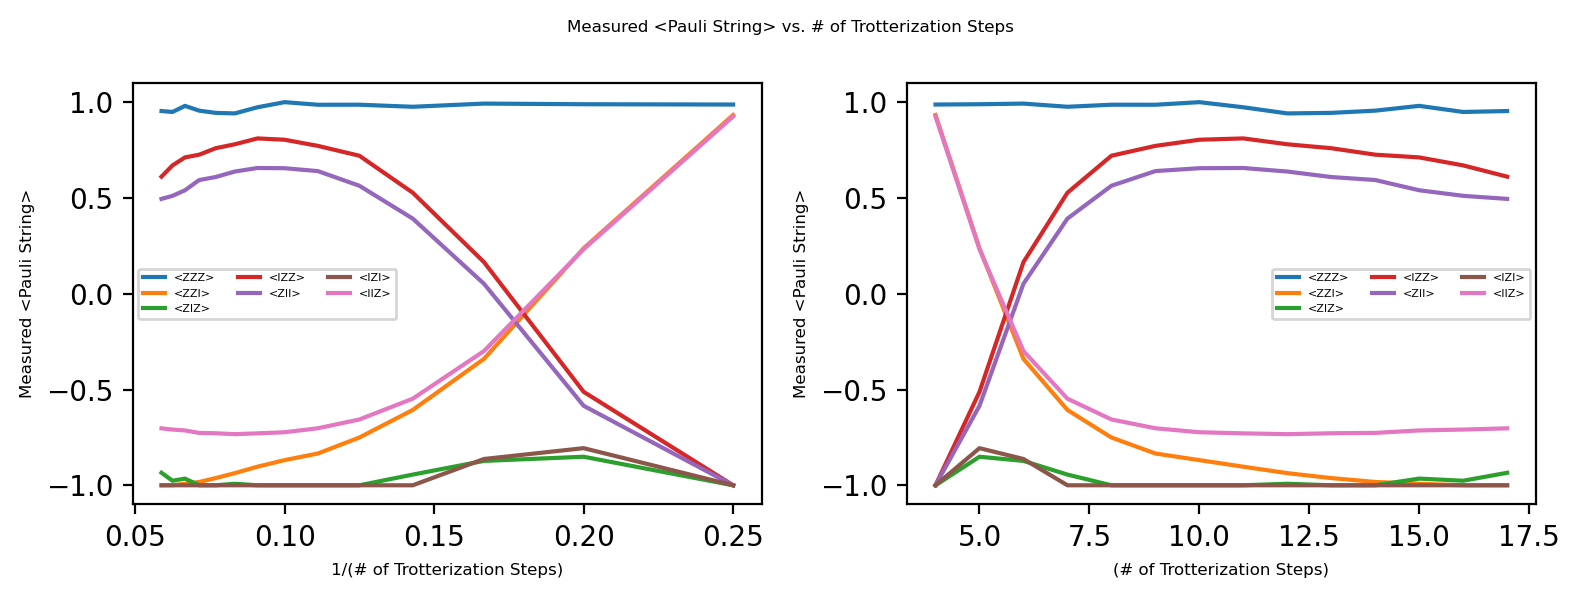

In [142]:
axs = plot_uf_parity(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

In [179]:
ps = list(list(res_analysis["analysis"].values())[0]["uf_parity"].keys())
len(ps)

63

ZXX r2  0.9933007389287534 a  -0.315591553736012
r^2:  0.9933007389287534
ZZI r2  0.9996878716834208 a  -1.0951222194261547
r^2:  0.9996878716834208
ZII r2  0.9972481097697108 a  0.9267460429498073
r^2:  0.9972481097697108
IYY r2  0.9921168907424929 a  0.298870523861406
r^2:  0.9921168907424929
IZZ r2  0.9966134049021846 a  1.0772500476336462
r^2:  0.9966134049021846
IIZ r2  0.9986105133313452 a  -0.8643911608443967
r^2:  0.9986105133313452


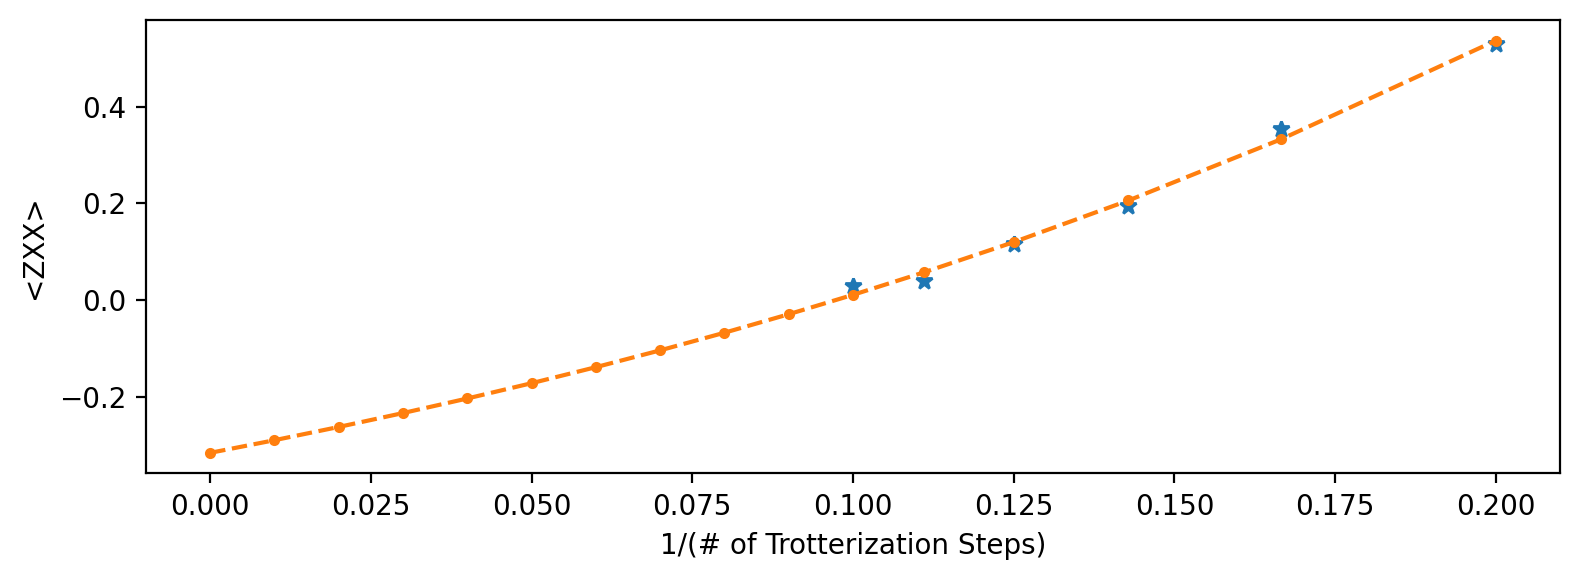

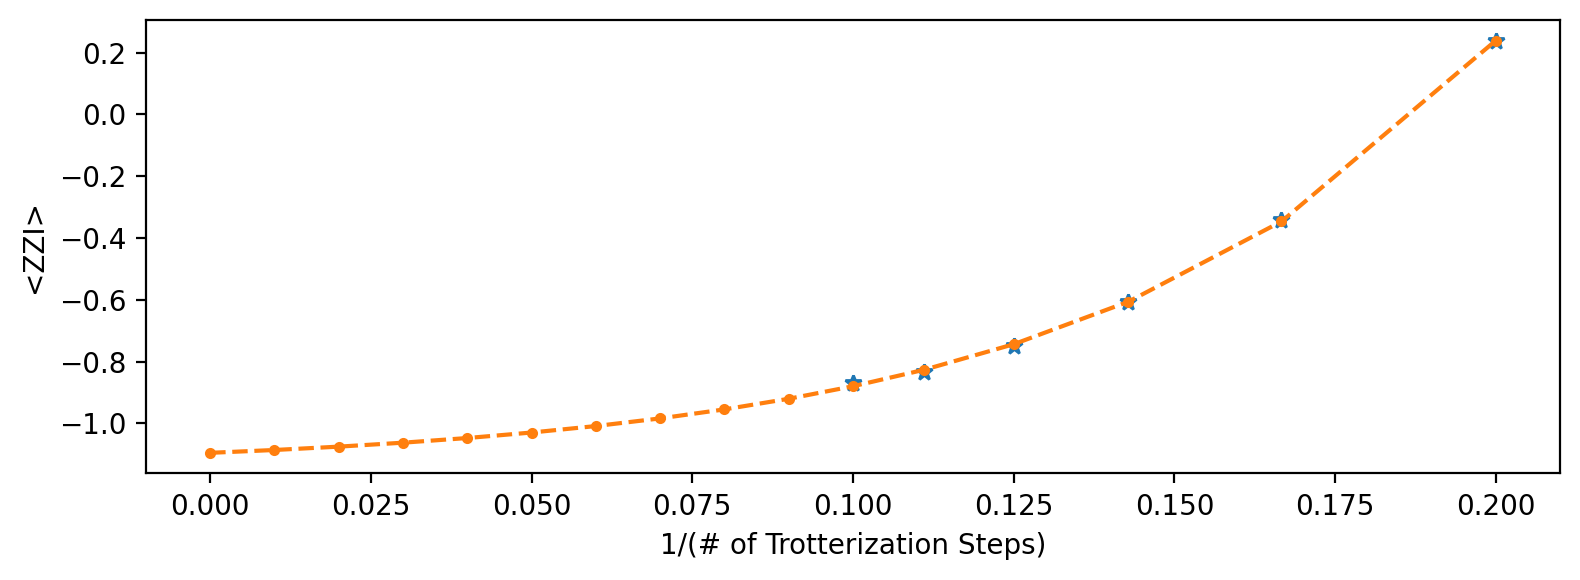

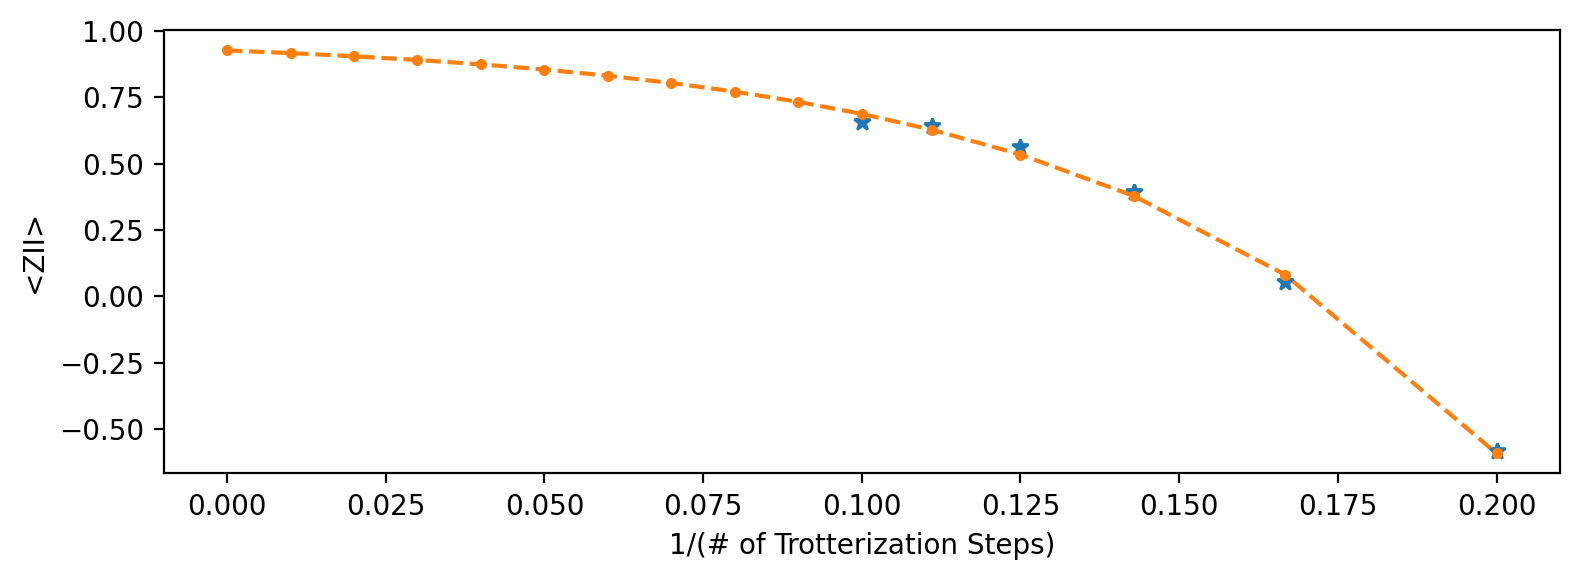

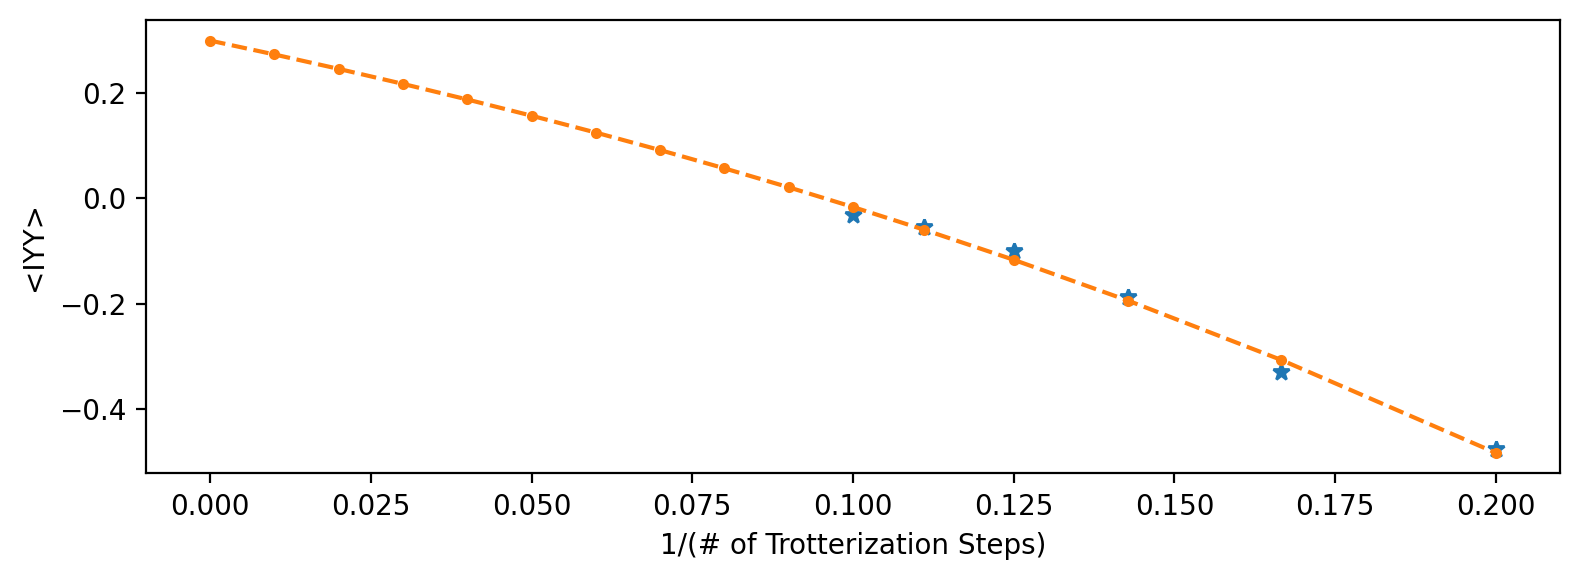

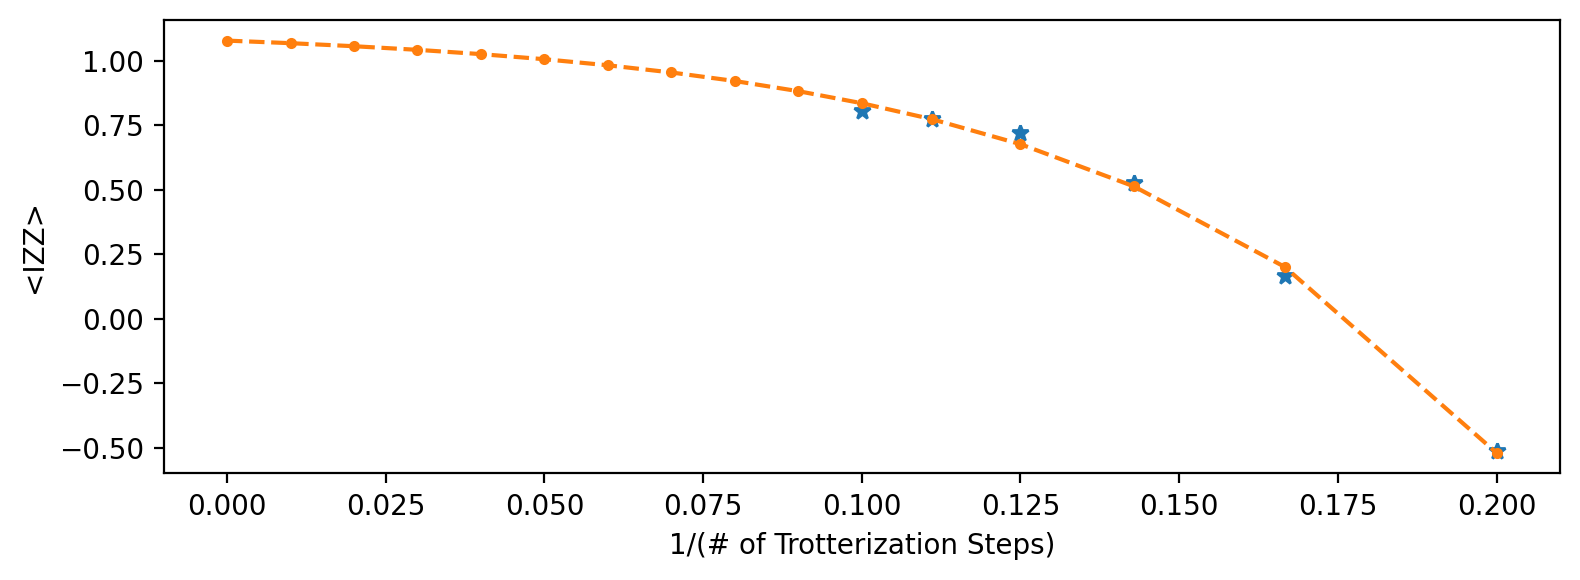

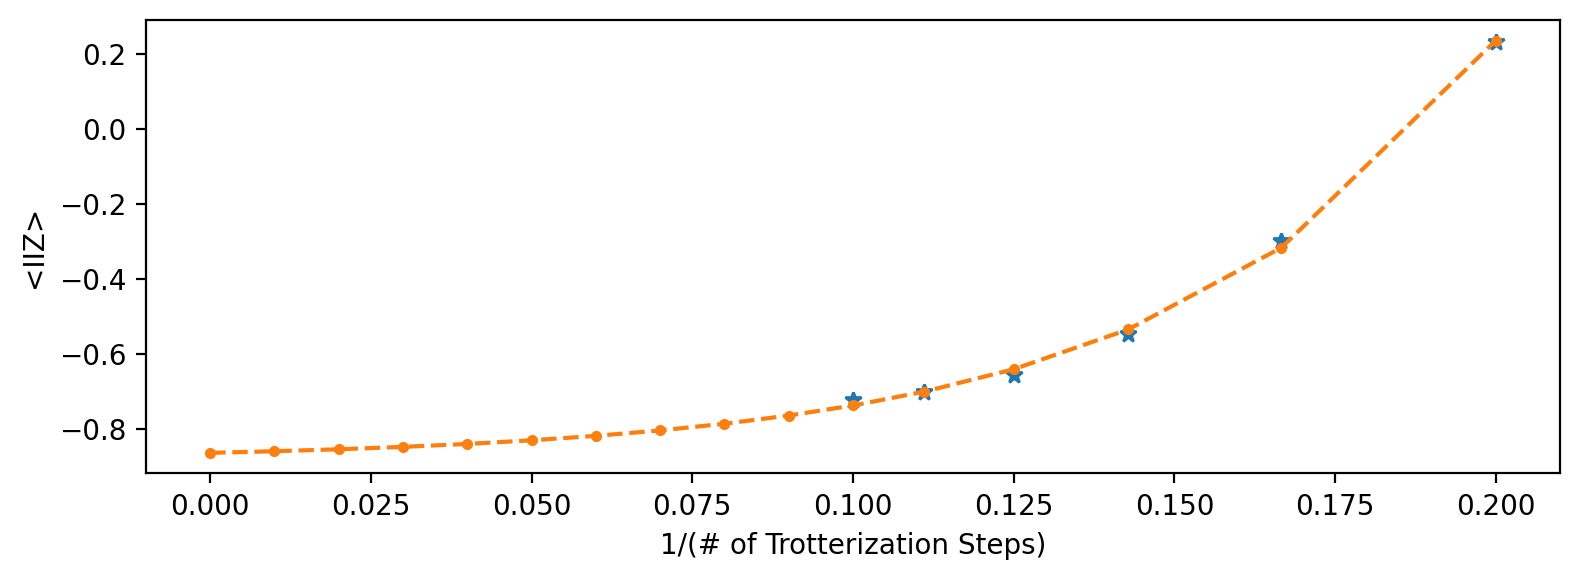

In [177]:
min_r2 = 0.99
for ps in pauli_combos:
    steps, metric = extract_metric(res_analysis, metric_func=lambda res: res["uf_parity"][ps], sweep_param_parser = trott_step_parser_factory(), data_key="analysis")
    a, r2 = fit_trott(steps, metric, plotting=False, y_label=f"<{ps}>")
    if r2 > min_r2:
        print(ps, "r2 ", r2, "a ", a)
        fit_trott(steps, metric, plotting=True, y_label=f"<{ps}>")

r^2:  0.03170667871327304
0.9937641857025902
r^2:  0.9996878716834208
-1.0951222194261547
r^2:  0.9199236378024161
-1.1859563093823255
r^2:  0.9966134049021846
1.0772500476336462
r^2:  0.9972481097697108
0.9267460429498073
r^2:  0.8894825747698296
-1.0698806650537183
r^2:  0.9986105133313452
-0.8643911608443967


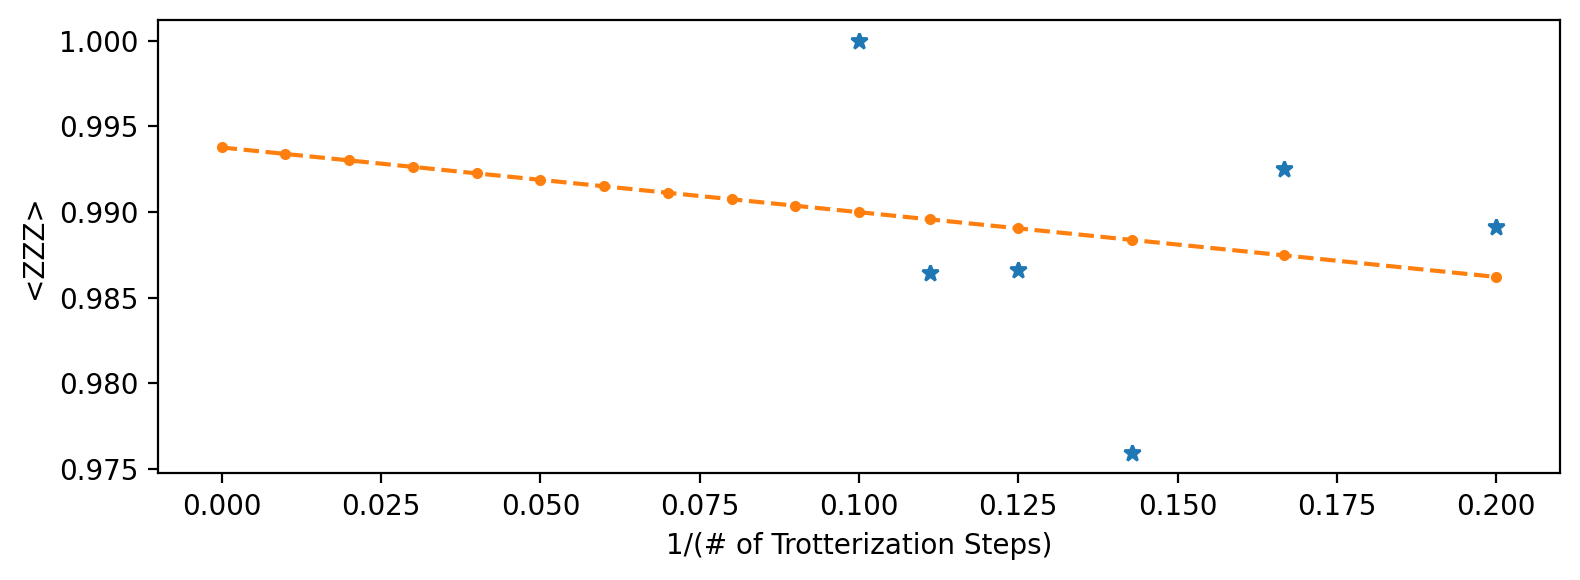

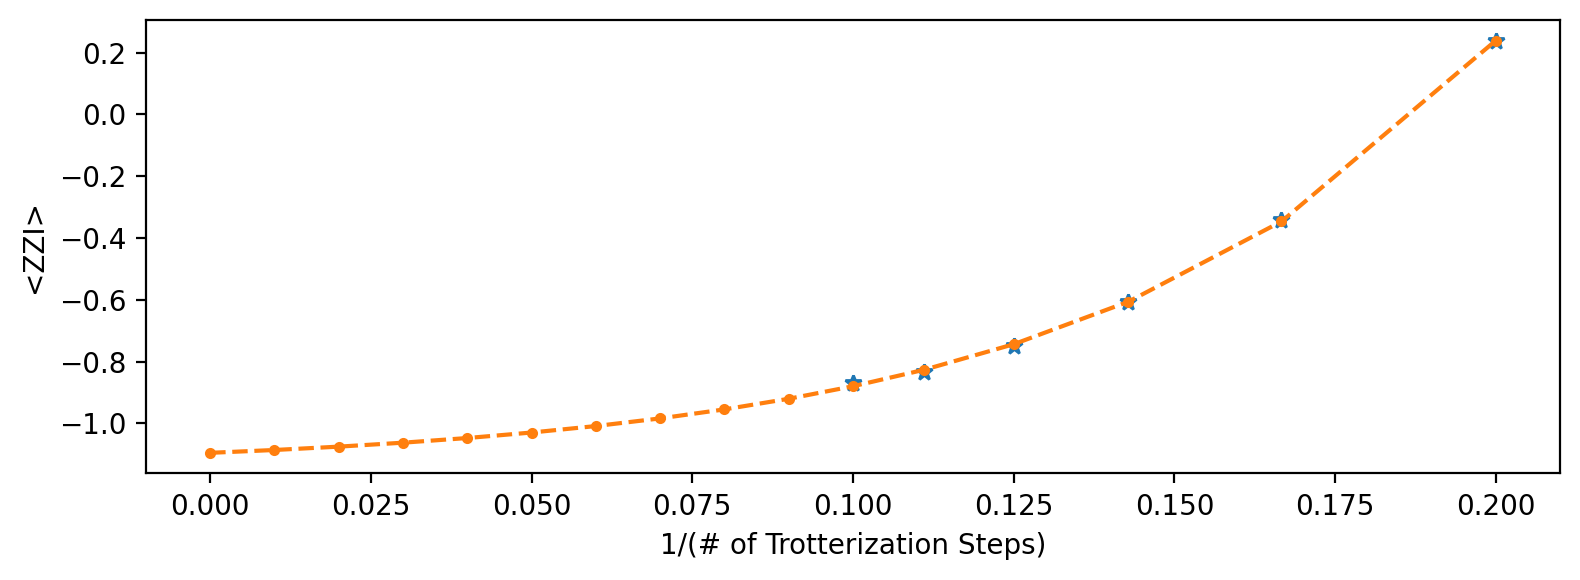

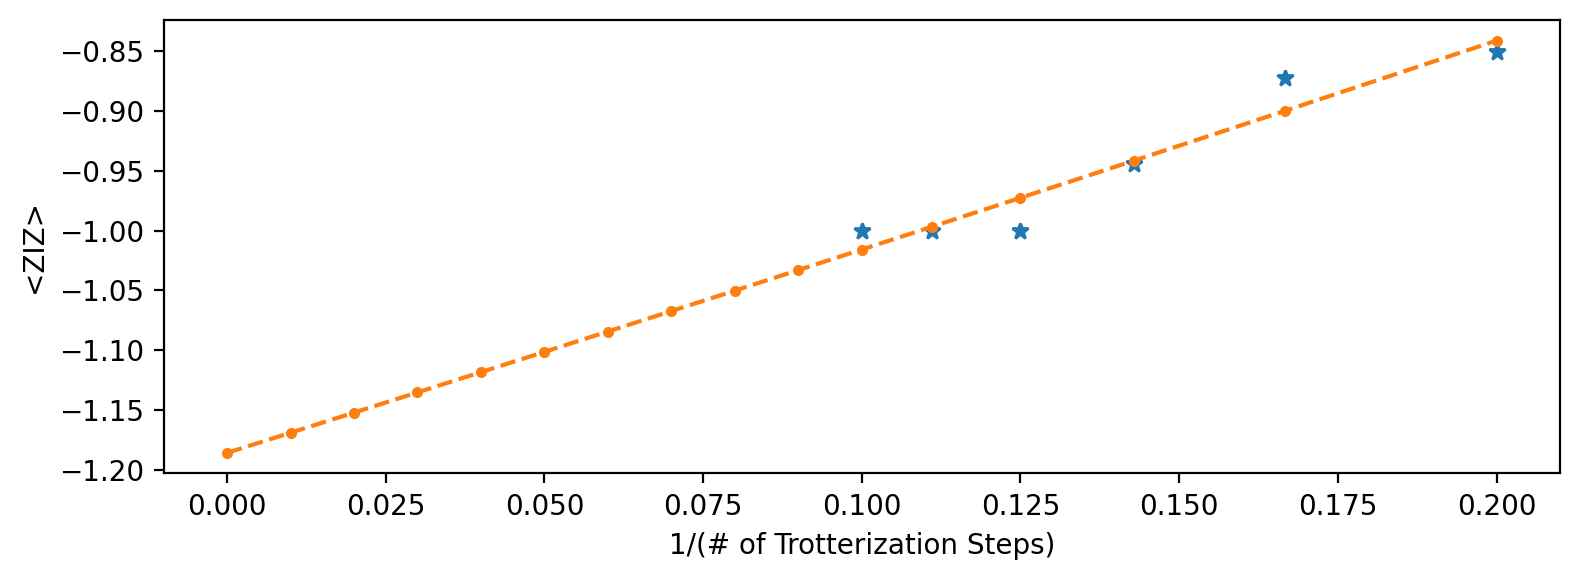

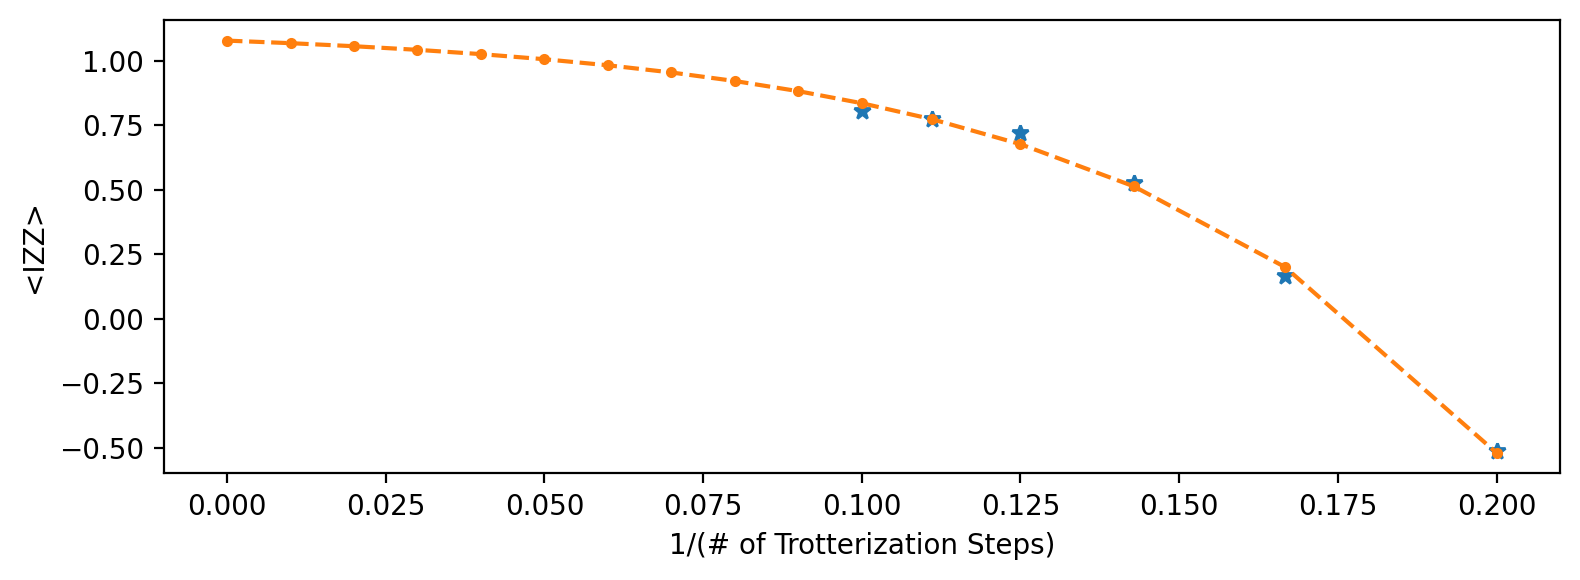

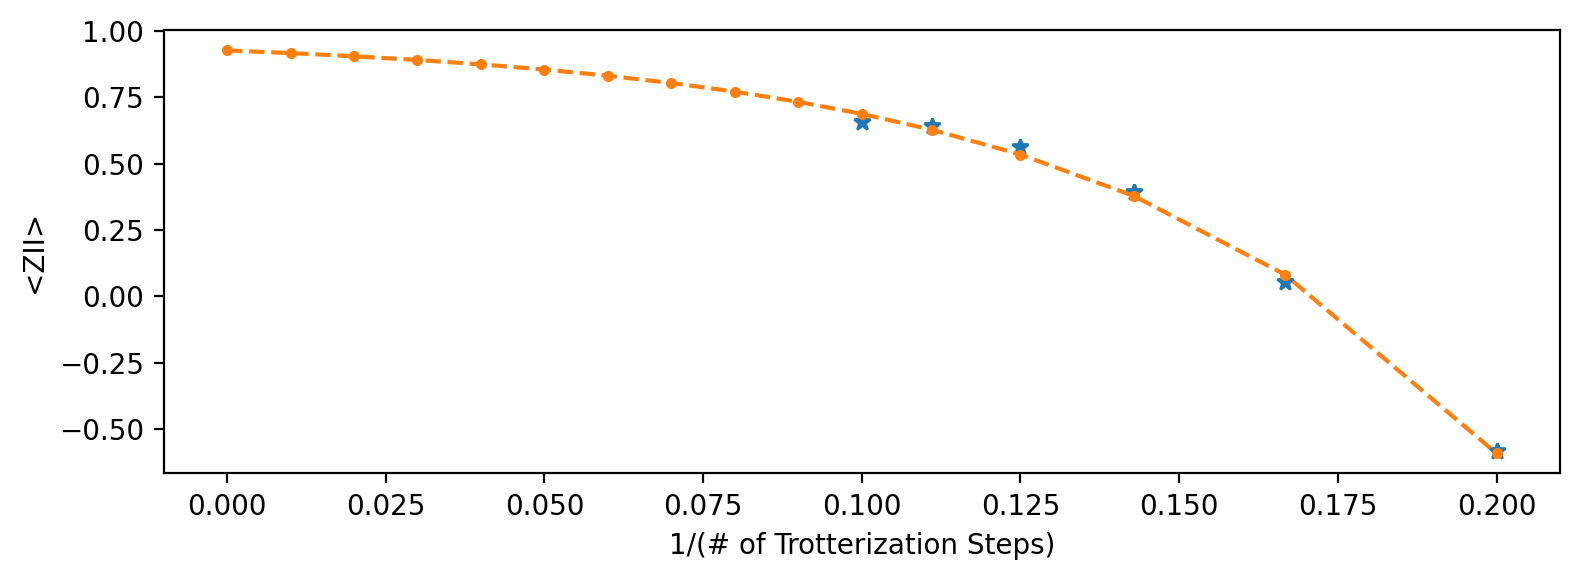

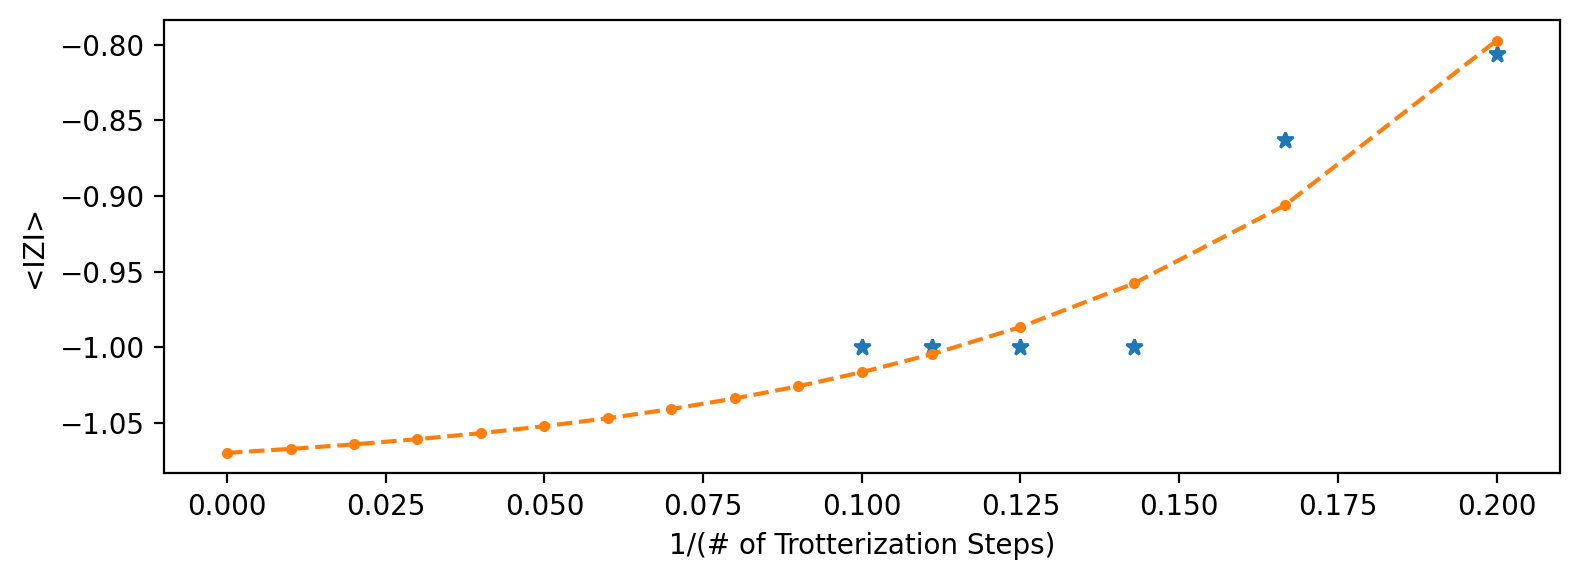

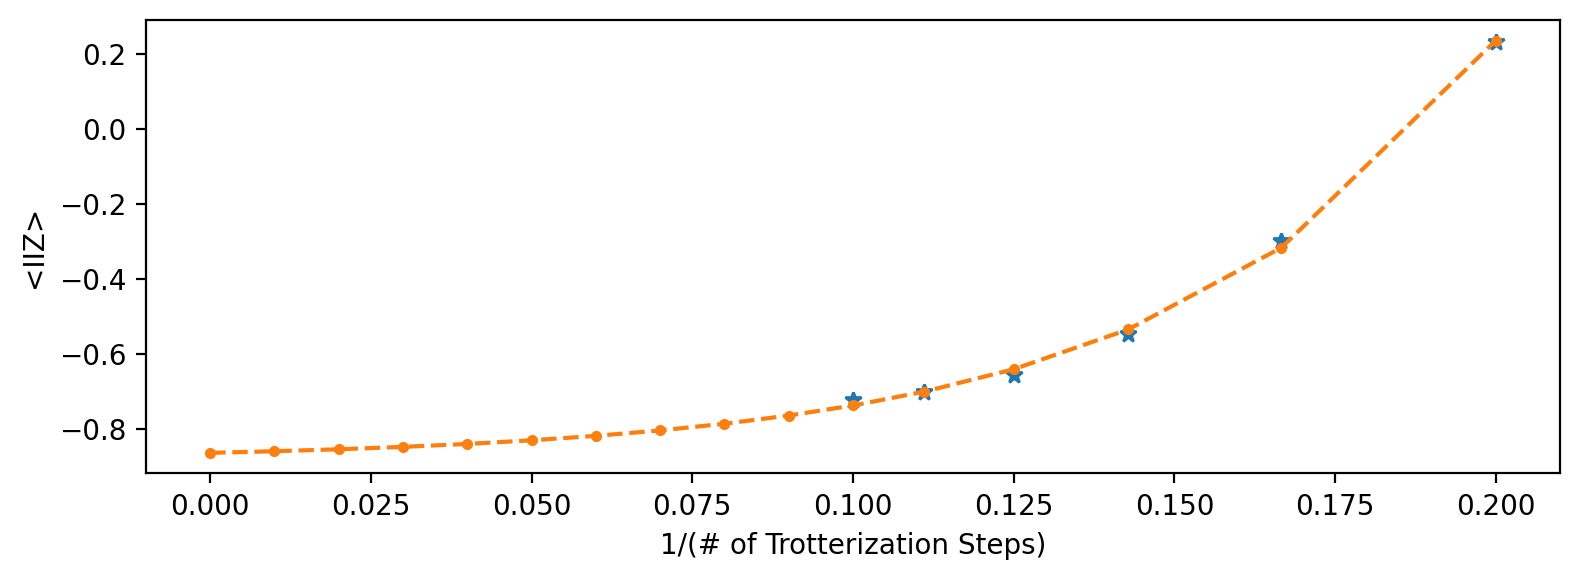

In [162]:
def trott_step_parser_factory(trott_step_min = 5, trott_step_max=10):
    def trott_step_parser(sweep_param):
        skip = sweep_param < trott_step_min or sweep_param > trott_step_max
        return 1/sweep_param, skip
    return trott_step_parser
    

for ps in ["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"]:
    steps, metric = extract_metric(res_analysis, metric_func=lambda res: res["uf_parity"][ps], sweep_param_parser = trott_step_parser_factory(), data_key="analysis")
    print(fit_trott(steps, metric, plotting=True, y_label=f"<{ps}>")[0])

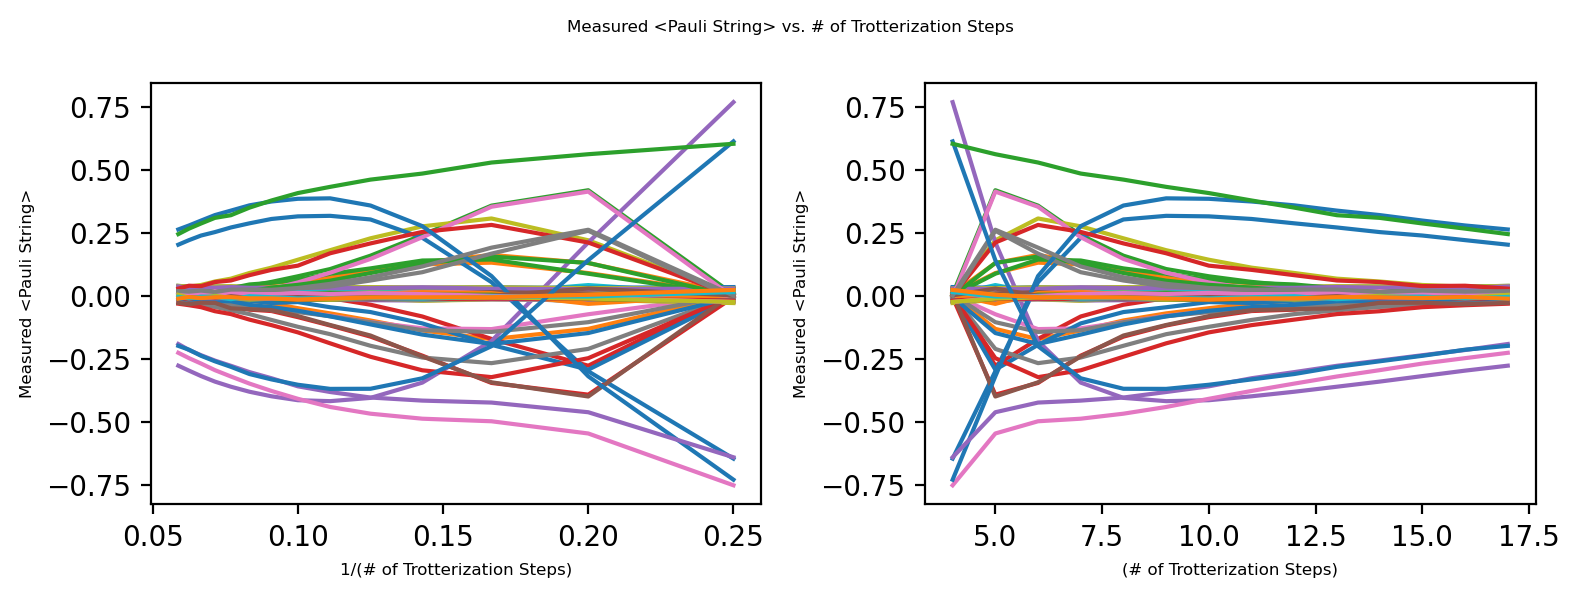

In [94]:
axs = plot_parity(res_analysis)

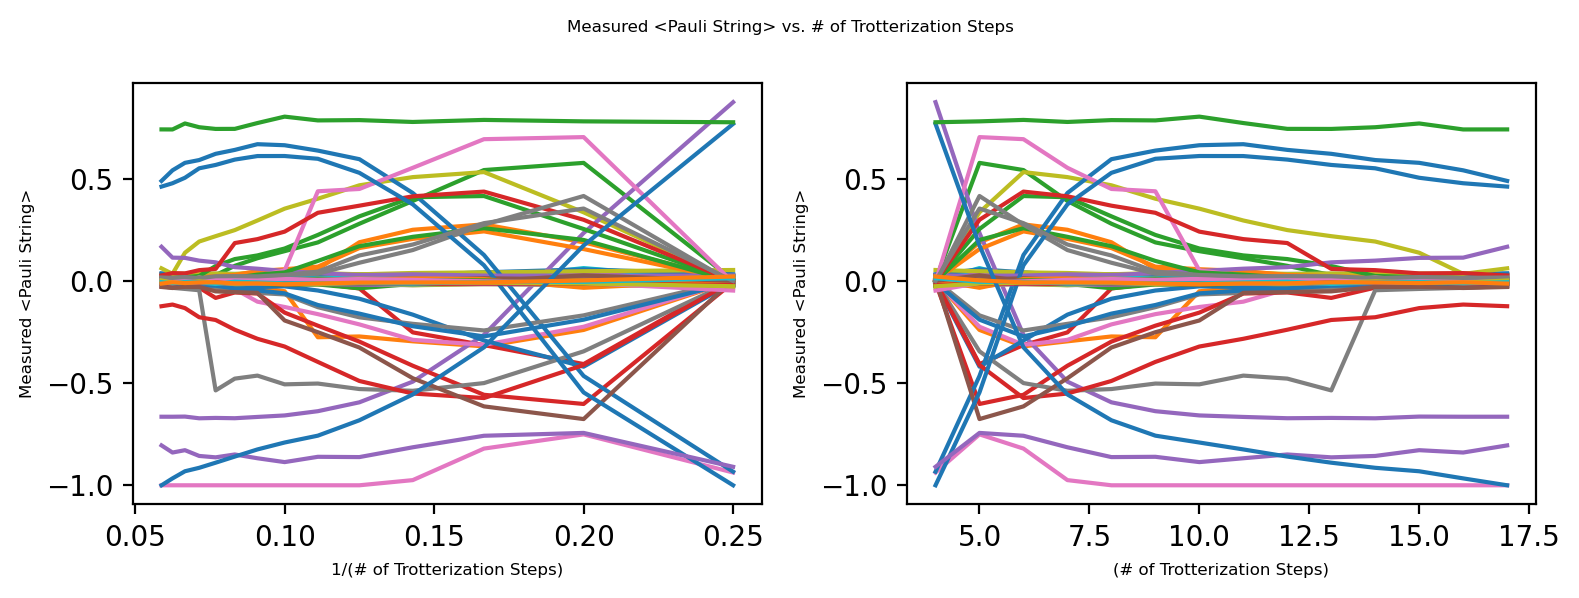

In [95]:
axs = plot_uf_parity(res_analysis)

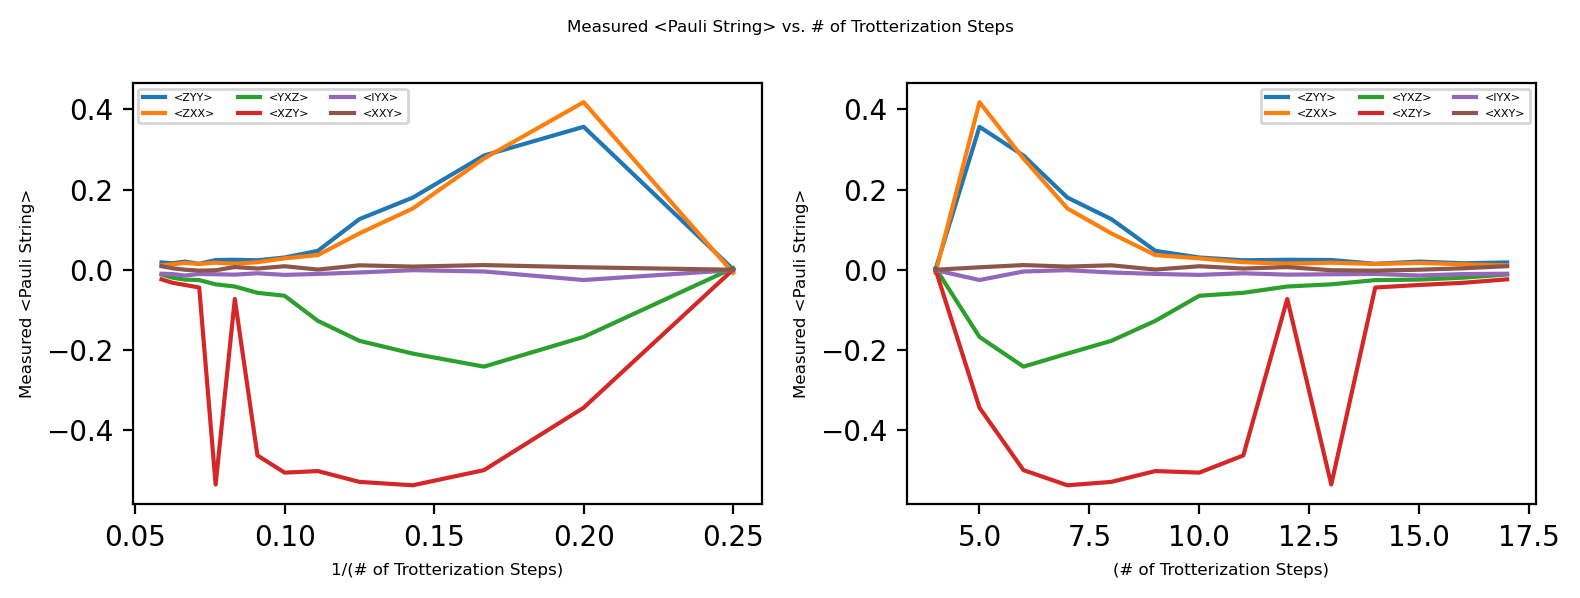

In [68]:
axs = plot_uf_parity(res_analysis, legend=True, parity_strings=["ZYY", "ZXX", "YXZ", "XZY", "IYX", "XXY"])

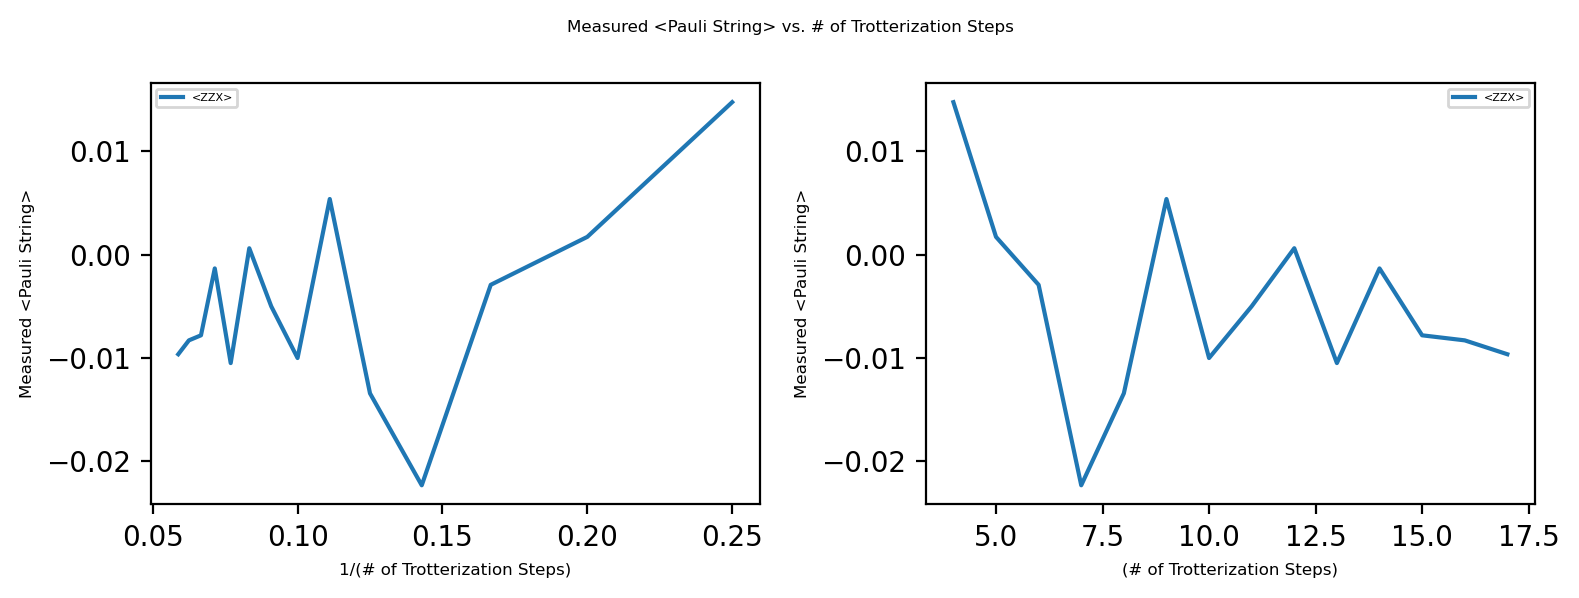

In [167]:
axs = plot_uf_parity(res_analysis, parity_strings=["ZZX"], legend=True)

# Fitting UF Example

r^2:  0.9793380399140584


(-2.3871651900195667, 0.9793380399140584)

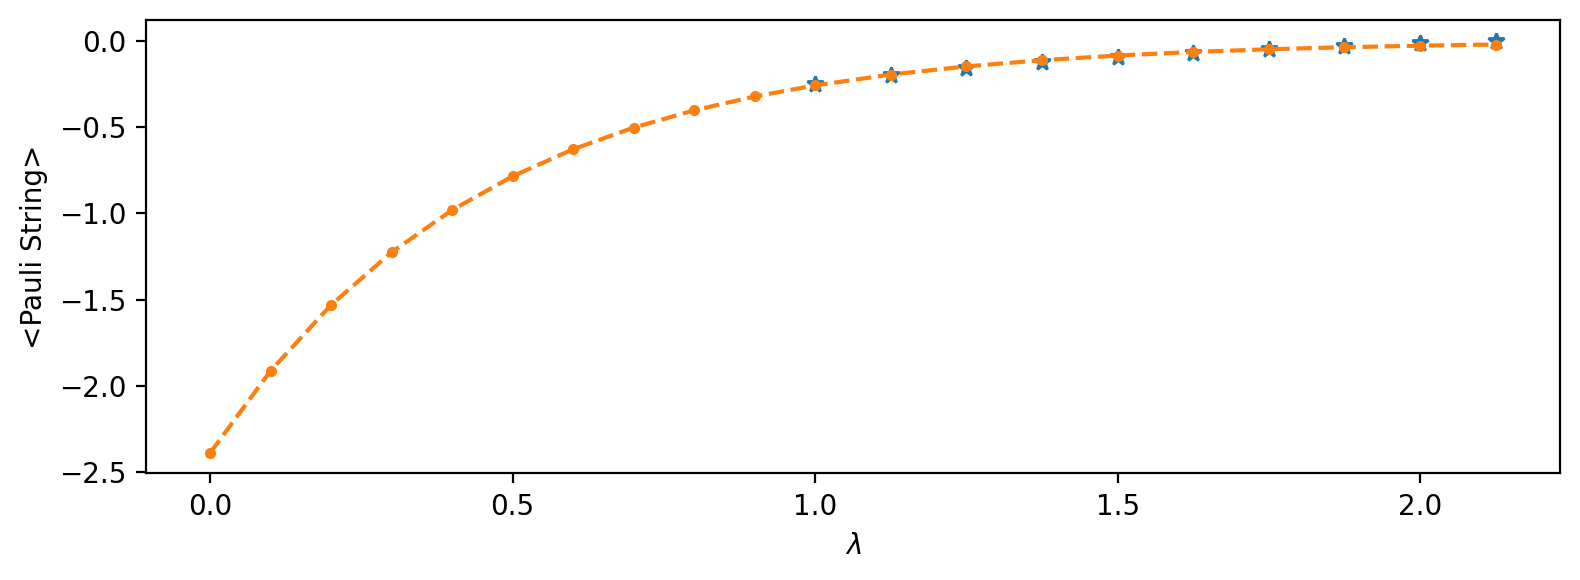

In [28]:
steps, metric = extract_metric(res_analysis, metric_func=lambda res: res["parity"]["IZI"], sweep_param_parser = unitary_folding_parser_factory(16))
fit_uf(steps, metric, plotting=True)

r^2:  0.905138798648909


(-1.0589075945736535, 0.905138798648909)

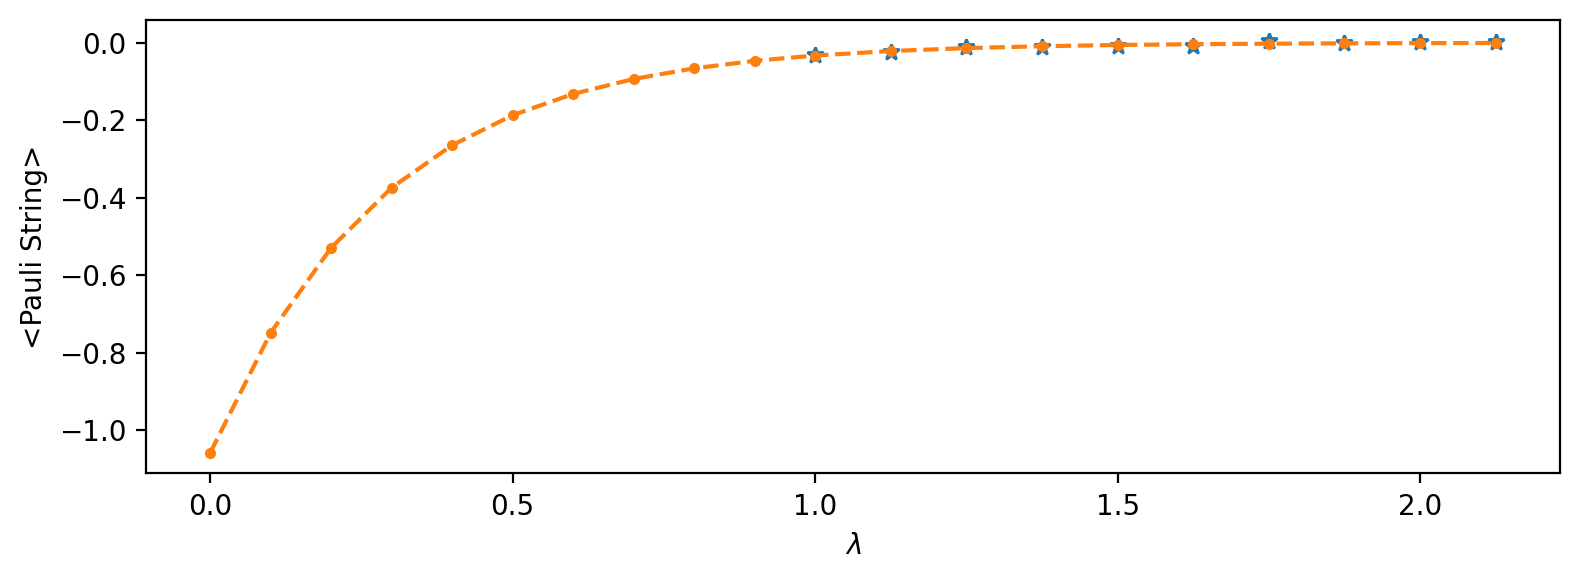

In [69]:
steps, metric = extract_metric(res_analysis, metric_func=lambda res: res["parity"]["XZY"], sweep_param_parser = unitary_folding_parser_factory(16))
fit_uf(steps, metric, plotting=True)

r^2:  0.9825392740869775


(-0.46249715515242135, 0.9825392740869775)

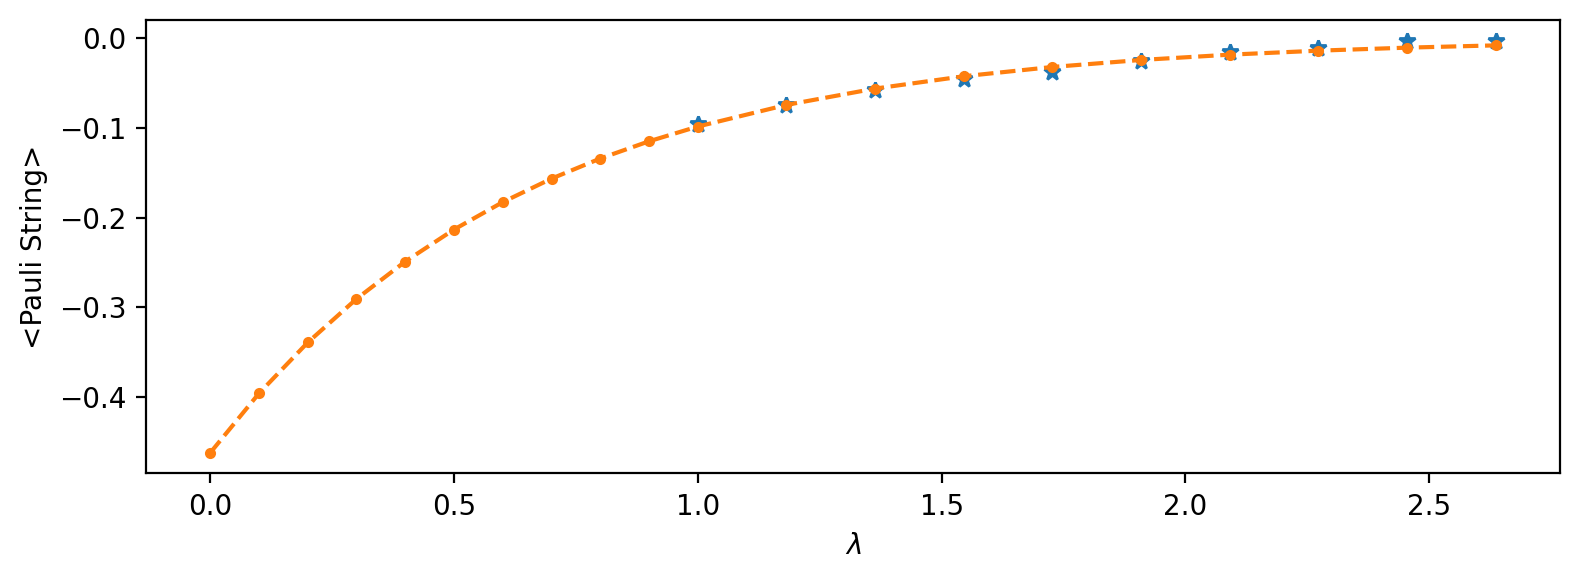

In [82]:
steps, metric = extract_metric(res_analysis, metric_func=lambda res: res["parity"]["XZY"], sweep_param_parser = unitary_folding_parser_factory(11))
fit_uf(steps, metric, plotting=True)

0.9859612468511365
0.9893479190830704
0.9941511682569686
0.9962078891778644
0.9981707693280295
0.9701250697079951
0.9989233188475749


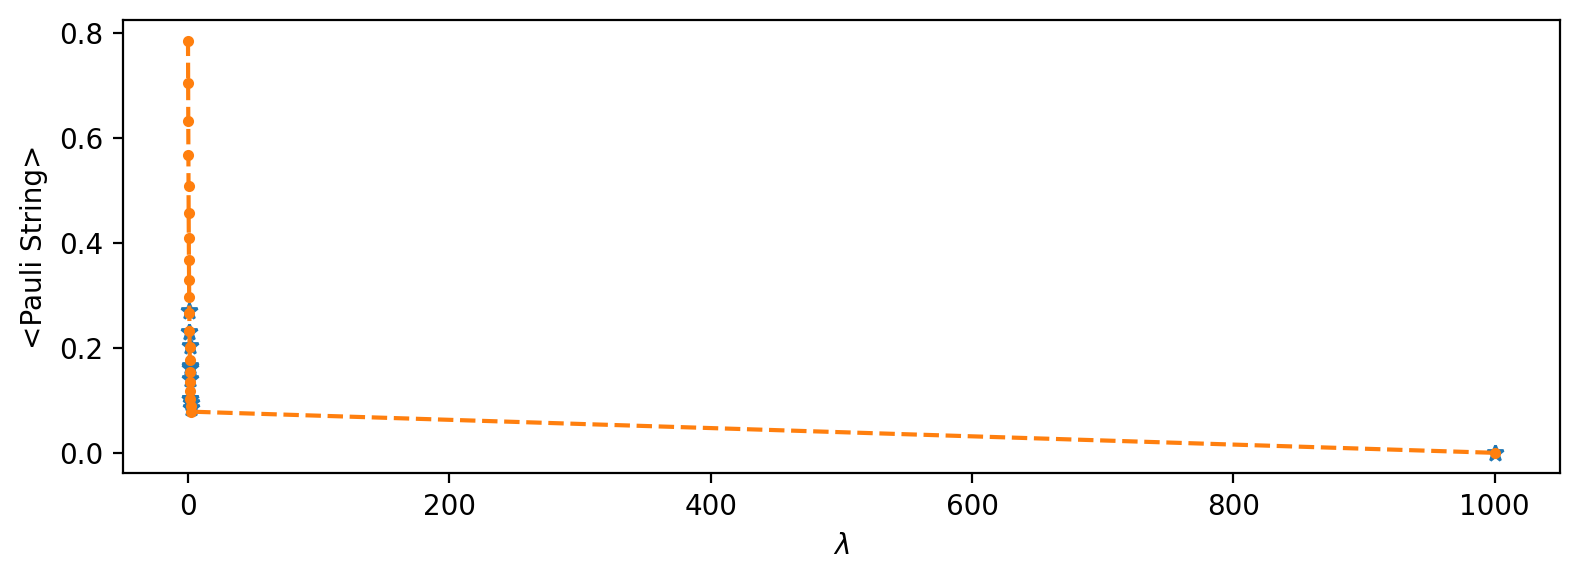

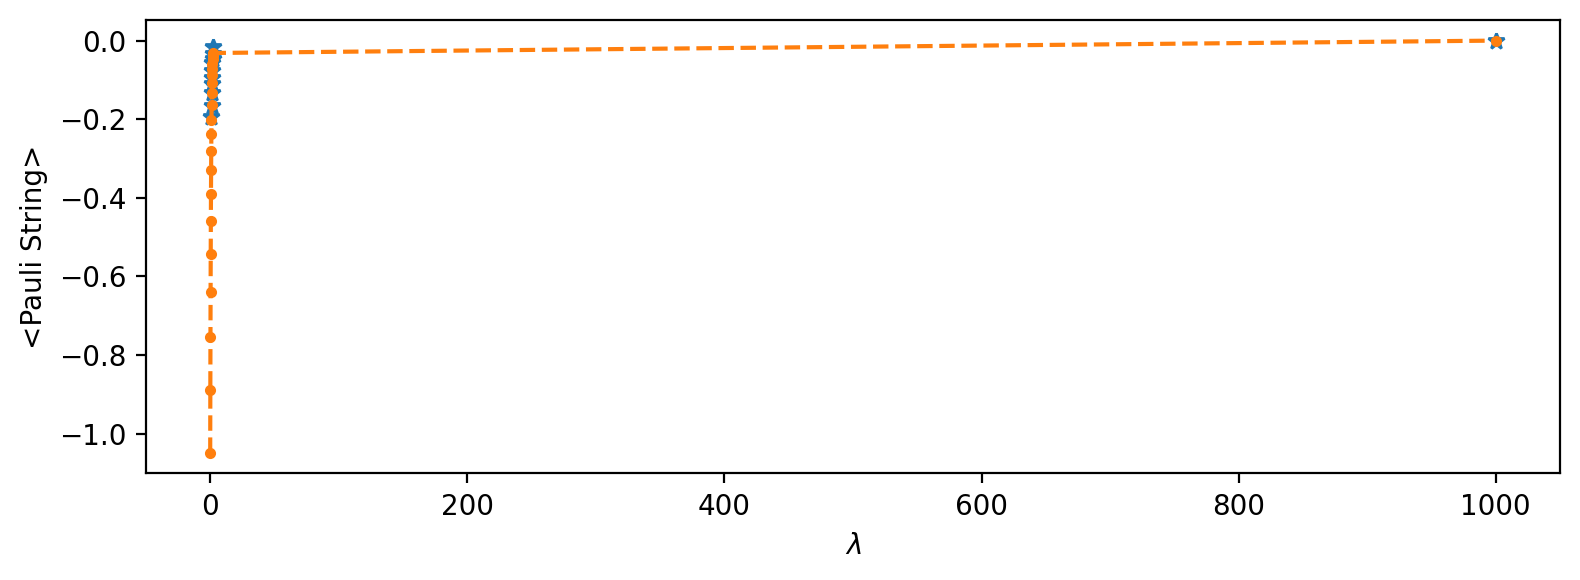

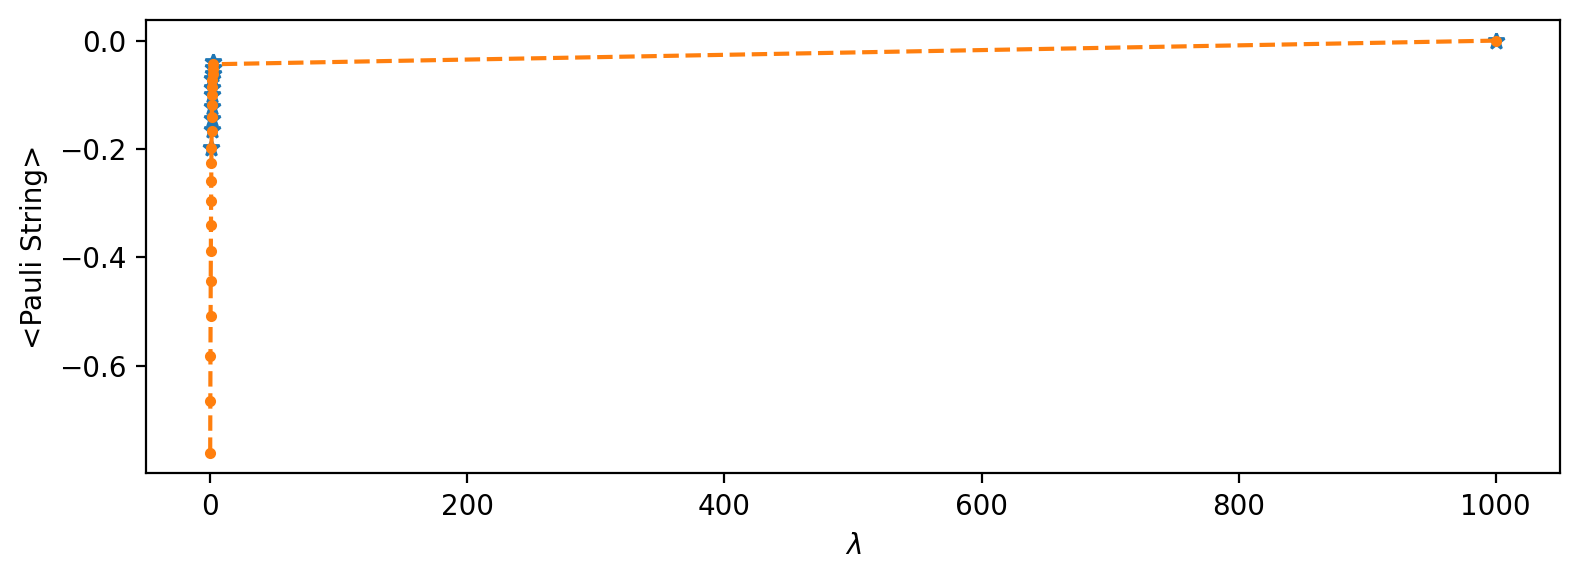

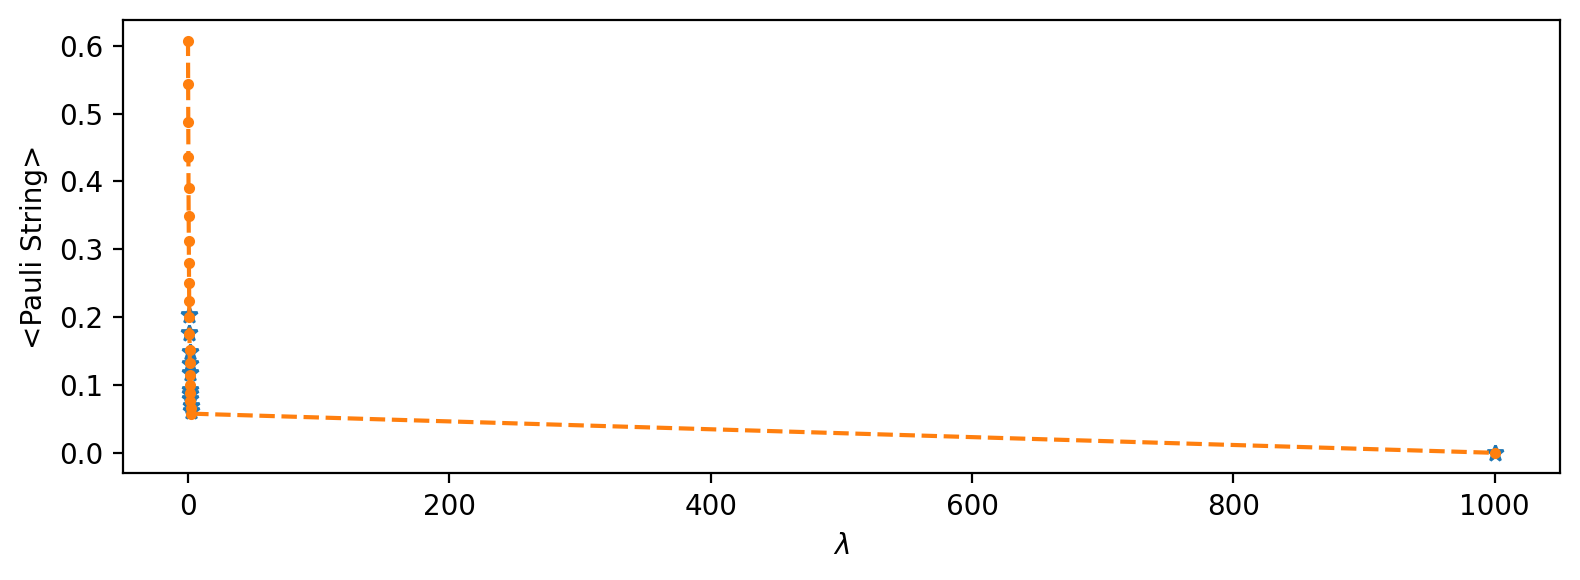

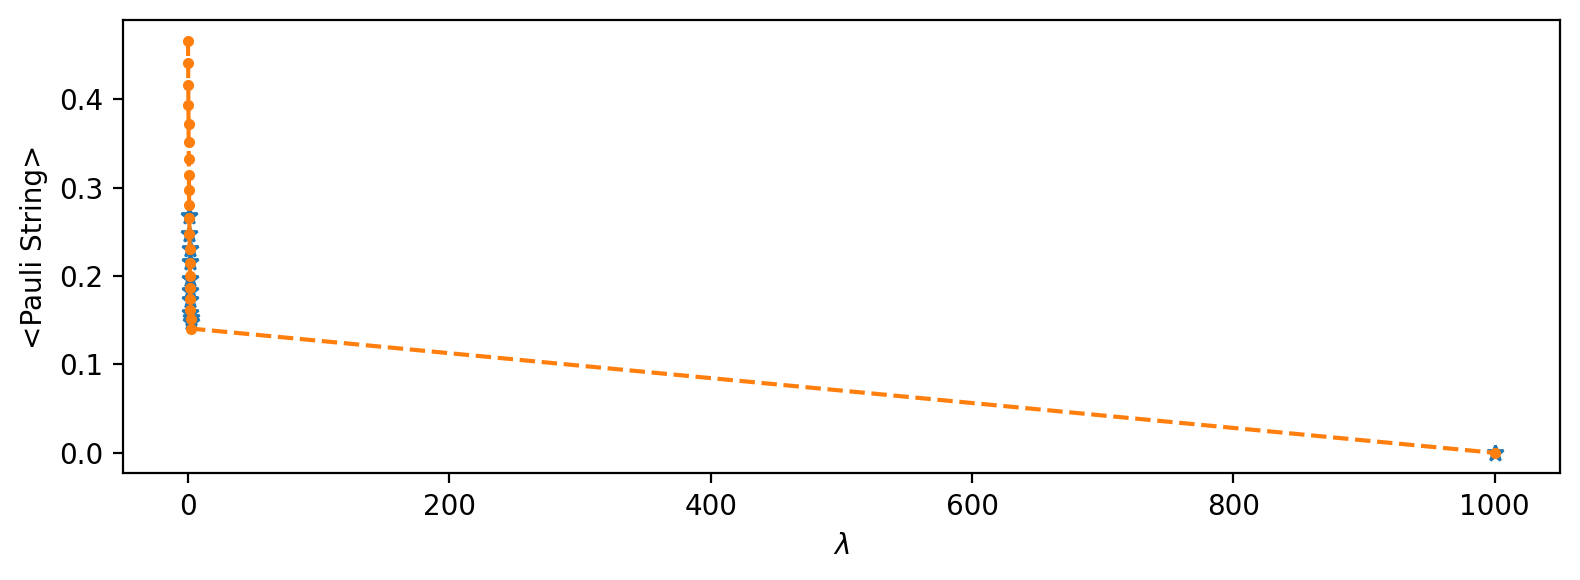

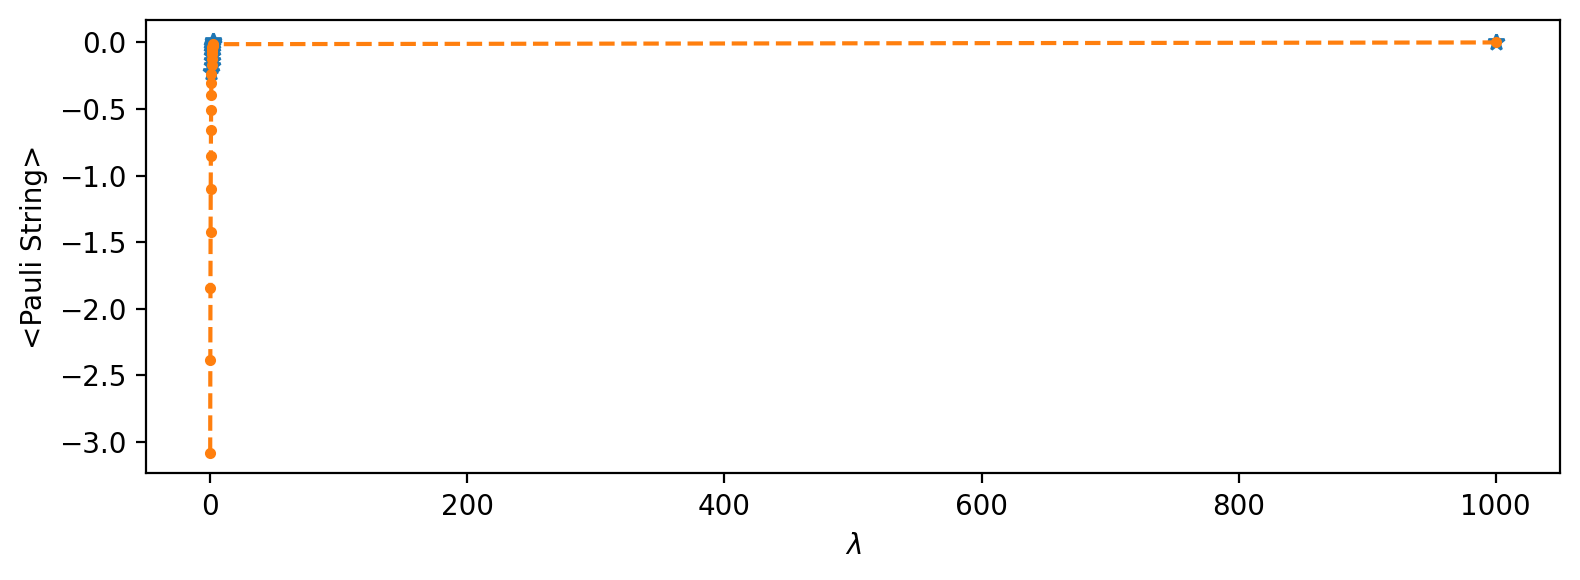

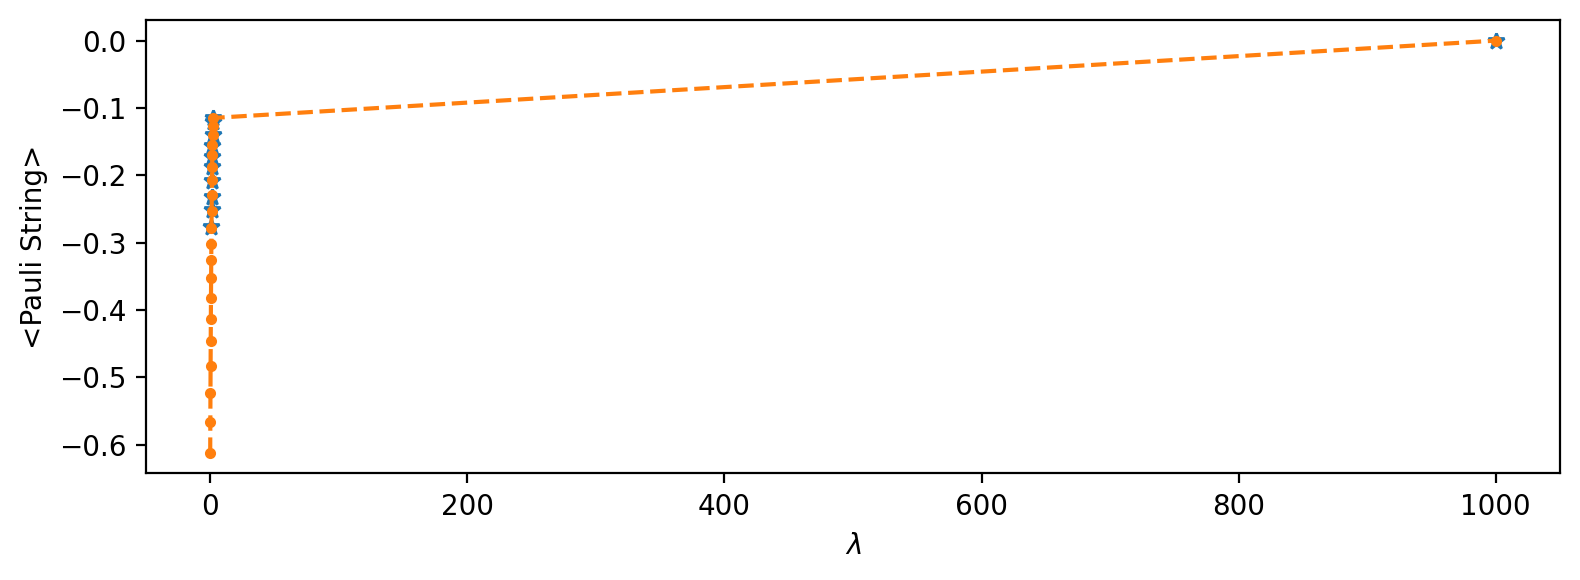

In [180]:
for ps in ["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"]:
    steps, metric = extract_metric(res_analysis, metric_func=lambda res: res["parity"][ps], sweep_param_parser = unitary_folding_parser_factory(16))
    fit_uf(steps, metric, plotting=True)

0.012144634852507738

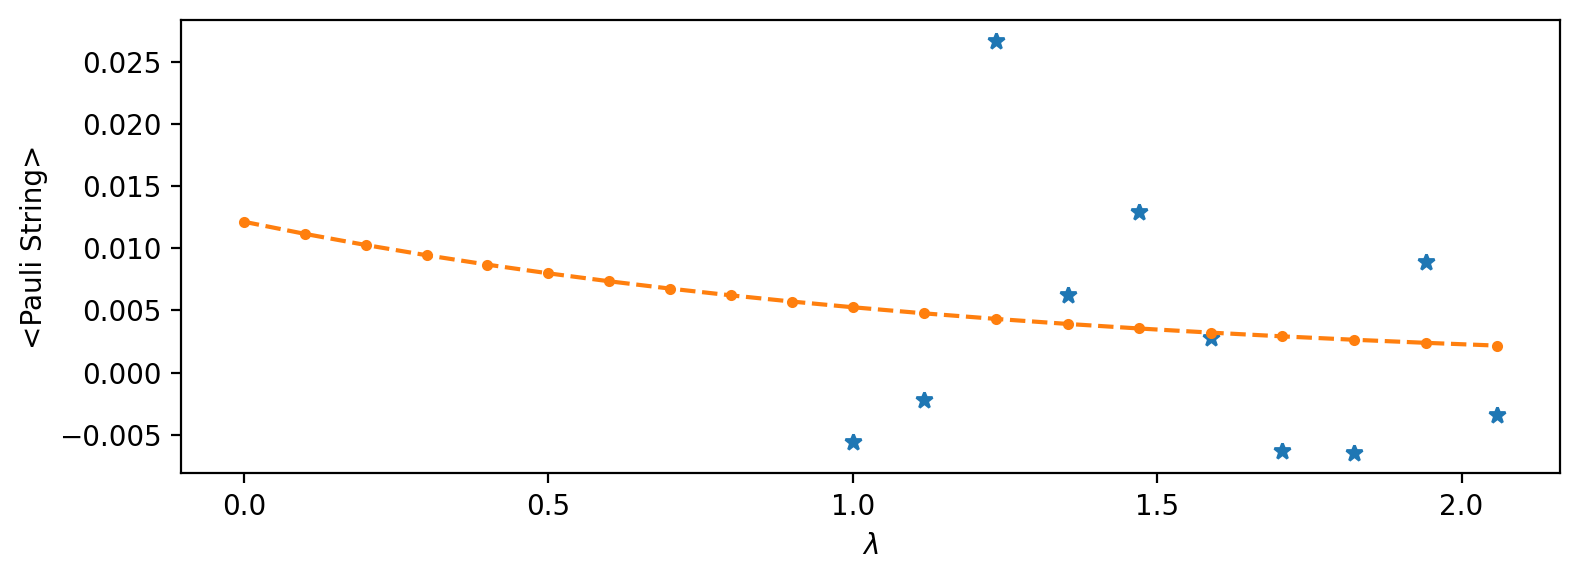

In [122]:
steps, metric = extract_metric(res_analysis, metric_func=lambda res: res["parity"]["XXX"], sweep_param_parser = sweep_param_parser_UF)
fit_uf(steps, metric, plotting=True)